## Segmentação de Clientes de Cartão de Crédito: Análise Exploratória, Clusterização e Modelagem Preditiva

<div style="text-align: center; margin-bottom: 20px;">
  <img src="../03-Recursos/credit_card_customer_clustering_image.png" style="width: 600px; display: block; margin-left: auto; margin-right: auto;"/>
</div>

## SUMÁRIO <a id="sumário"></a>

[1. Introdução 🚀](#1-introdução) <br>

[2. Objetivo do Projeto 🎯](#2-objetivo-do-projeto) <br>

[3. Importação de Bibliotecas e Configurações Iniciais 📚](#3-importação-de-bibliotecas-e-configurações-iniciais) <br>

[4. Carregamento e Pré-processamento dos Dados 🔄](#4-carregamento-e-pré-processamento-dos-dados) <br>

[5. Análise Exploratória de Dados (EDA) 📊](#5-análise-exploratória-de-dados-eda) <br>

[6. Análise de Segmentação (Clusterização) 🔍](#6-análise-de-segmentação-clusterização) <br>

[7. Modelagem Preditiva 🤖](#7-modelagem-preditiva) <br>

[8. Avaliação dos Modelos 📏](#8-avaliação-dos-modelos) <br>

[9. Discussão e Interpretação dos Resultados 🗣️](#9-discussão-e-interpretação-dos-resultados) <br>

[10. Conclusão e Recomendações 🏁](#10-conclusão-e-recomendações) <br>

## 1. Introdução 🚀 <a id="1-introdução"></a> 
[Voltar ao Sumário](#sumário)

No setor financeiro, compreender o comportamento dos clientes é fundamental para o desenvolvimento de estratégias de marketing eficazes. A segmentação de clientes permite que as instituições financeiras identifiquem grupos com características e necessidades semelhantes, possibilitando a oferta de produtos e serviços mais alinhados às expectativas de cada segmento. Essa abordagem personalizada não só aumenta a satisfação dos clientes, mas também otimiza os recursos de marketing, direcionando esforços para os públicos com maior potencial de conversão.

Este projeto visa analisar o comportamento de uso de aproximadamente 9.000 titulares ativos de cartões de crédito ao longo dos últimos seis meses. Utilizando um conjunto de 18 variáveis comportamentais, serão aplicadas técnicas de análise exploratória de dados, segmentação por meio de algoritmos de clusterização e modelagem preditiva. O objetivo é identificar padrões de uso e desenvolver estratégias de marketing direcionadas que atendam às necessidades específicas de cada segmento de clientes.

A aplicação de técnicas de aprendizado de máquina para a segmentação de clientes no setor financeiro tem se mostrado uma abordagem eficaz para a personalização de ofertas e melhoria do relacionamento com o cliente. Ao compreender os diferentes perfis de clientes, as instituições financeiras podem adaptar suas estratégias de marketing, aumentando a eficiência das campanhas e a satisfação dos clientes.

Além disso, a modelagem preditiva desempenha um papel crucial ao permitir que as instituições financeiras antecipem comportamentos futuros dos clientes, como a probabilidade de inadimplência ou a propensão à aquisição de novos produtos. Ao analisar dados históricos e atuais, os modelos preditivos fornecem insights que auxiliam na tomada de decisões proativas, mitigando riscos e aproveitando oportunidades de mercado.

Este estudo contribuirá para a identificação de segmentos de clientes com base em seus comportamentos de uso de cartão de crédito, fornecendo insights valiosos para a definição de estratégias de marketing mais assertivas e personalizadas, bem como para a implementação de ações preditivas que aprimorem a gestão de riscos e a oferta de produtos financeiros.

## 2. Objetivo do Projeto 🎯 <a id="2-objetivo-do-projeto"></a>
[Voltar ao Sumário](#sumário)

Este projeto tem como objetivo principal desenvolver uma segmentação de clientes de cartão de crédito para aprimorar as estratégias de marketing de uma instituição financeira. Para alcançar esse objetivo, serão realizadas as seguintes etapas:

1. **Análise Exploratória de Dados (EDA)**: Examinar detalhadamente o conjunto de dados para compreender o comportamento dos clientes, identificar padrões de uso, tendências e possíveis anomalias. Esta etapa fornecerá insights iniciais sobre os dados e embasará as próximas fases do projeto.

2. **Análise de Segmentação (Clusterização)**: Aplicar técnicas de aprendizado não supervisionado para agrupar clientes com características e comportamentos semelhantes. A clusterização permitirá identificar segmentos distintos dentro da base de clientes, auxiliando na personalização de ofertas e estratégias de marketing direcionadas.

3. **Modelagem Preditiva**: Desenvolver modelos de aprendizado supervisionado para prever comportamentos futuros dos clientes, como a probabilidade de inadimplência ou a propensão à aquisição de novos produtos. A modelagem preditiva fornecerá subsídios para ações proativas, mitigando riscos e aproveitando oportunidades de mercado.

Ao final, espera-se que este projeto forneça uma compreensão aprofundada dos diferentes perfis de clientes, permitindo à instituição financeira elaborar estratégias de marketing mais assertivas e personalizadas, além de melhorar a gestão de riscos e a oferta de produtos financeiros.

## 3. Importação de Bibliotecas e Configurações Iniciais 📚 <a id="3-importação-de-bibliotecas-e-configurações-iniciais"></a>

Nesta seção, importaremos as bibliotecas essenciais para a análise de dados, visualização e construção de modelos de machine learning. Além disso, definiremos configurações iniciais para garantir a consistência e a qualidade das visualizações ao longo do projeto.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from platform import python_version
import warnings

# Bibliotecas do scikit-learn para modelagem, pré-processamento e clusterização
import sklearn  # Importação direta para exibição da versão
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN  # Adicionado os algoritmos de clustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score  # Adicionados as métricas

# Configuração de estilo para os gráficos
sns.set(style="whitegrid")

# Tabela de versões das bibliotecas e do Python
library_versions = {
    "Pandas": pd.__version__,
    "NumPy": np.__version__,
    "Matplotlib": matplotlib.__version__,
    "Seaborn": sns.__version__,
    "Scikit-Learn": sklearn.__version__,
}

# Exibindo as versões das bibliotecas
print("Versões das Bibliotecas:\n")
print(f"{'Biblioteca':<20} | {'Versão':>10}")
for nome, versao in library_versions.items():
    print(f"{nome:<20} | {versao:>10}")

# Versão do Python
print("\nVersão do Python:")
print(python_version())

# Supressão de avisos desnecessários
warnings.filterwarnings("ignore", category=RuntimeWarning)  # Ignorar RuntimeWarnings
warnings.filterwarnings("ignore", category=UserWarning)     # Ignorar UserWarnings

Versões das Bibliotecas:

Biblioteca           |     Versão
Pandas               |      1.5.3
NumPy                |     1.24.3
Matplotlib           |      3.7.1
Seaborn              |     0.12.2
Scikit-Learn         |      1.5.1

Versão do Python:
3.11.10


## 4. Carregamento e Pré-Processamento dos Dados 🔄 <a id="4-carregamento-e-pré-processamento-dos-dados"></a>
[Voltar ao Sumário](#sumário)

Nesta seção, realizamos as seguintes etapas:

1. **Carregamento dos dados**: Importamos o conjunto de dados de clientes de cartão de crédito para o ambiente de análise.

2. **Visualização inicial**: Exibimos as primeiras linhas do dataset para compreender sua estrutura e conteúdo.

3. **Renomeação de colunas**: Traduzimos os nomes das colunas para o português, adotando o formato *snake_case* para padronização.

4. **Verificação de valores ausentes**: Identificamos e removemos registros com valores nulos nas colunas 'valor_minimo_pagamentos' e 'limite_credito', devido à baixa quantidade de dados faltantes.

5. **Detecção de duplicatas**: Confirmamos a ausência de registros duplicados no dataset.

Essas ações asseguram que os dados estejam limpos e estruturados adequadamente para as análises subsequentes.

In [2]:
#Leitura e exibição do dataset de treino
df = pd.read_csv("../01-Base-de-Dados/credit_card_clients_base.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Dicionário com nomes das colunas originais, novos nomes em português (snake_case) e descrições
colunas_traduzidas_descricao = {
    "CUST_ID": ("id_cliente", "Identificação única do titular do cartão de crédito."),
    "BALANCE": ("saldo", "Valor do saldo restante na conta para realizar compras."),
    "BALANCE_FREQUENCY": ("frequencia_atualizacao_saldo", "Frequência com que o saldo é atualizado (0 = raramente, 1 = frequentemente)."),
    "PURCHASES": ("valor_total_compras", "Valor total das compras feitas na conta."),
    "ONEOFF_PURCHASES": ("valor_compras_unicas", "Valor das compras feitas em uma única transação."),
    "INSTALLMENTS_PURCHASES": ("valor_compras_parceladas", "Valor das compras realizadas em parcelas."),
    "CASH_ADVANCE": ("valor_adiantamento_dinheiro", "Valor de dinheiro adiantado fornecido ao usuário."),
    "PURCHASES_FREQUENCY": ("frequencia_compras", "Frequência com que as compras são realizadas (0 = raramente, 1 = frequentemente)."),
    "ONEOFF_PURCHASES_FREQUENCY": ("frequencia_compras_unicas", "Frequência de compras realizadas em uma única transação (0 = raramente, 1 = frequentemente)."),
    "PURCHASES_INSTALLMENTS_FREQUENCY": ("frequencia_compras_parceladas", "Frequência de compras realizadas em parcelas (0 = raramente, 1 = frequentemente)."),
    "CASH_ADVANCE_FREQUENCY": ("frequencia_adiantamento_dinheiro", "Frequência com que o adiantamento de dinheiro é utilizado."),
    "CASH_ADVANCE_TRX": ("numero_transacoes_adiantamento_dinheiro", "Número de transações realizadas com adiantamento de dinheiro."),
    "PURCHASES_TRX": ("numero_transacoes_compras", "Número de transações de compras realizadas."),
    "CREDIT_LIMIT": ("limite_credito", "Limite de crédito disponível para o usuário."),
    "PAYMENTS": ("valor_pagamentos", "Valor total dos pagamentos realizados pelo usuário."),
    "MINIMUM_PAYMENTS": ("valor_minimo_pagamentos", "Valor mínimo dos pagamentos realizados pelo usuário."),
    "PRC_FULL_PAYMENT": ("percentual_pagamento_integral", "Percentual do pagamento integral realizado pelo usuário."),
    "TENURE": ("tempo_servico", "Duração do serviço de cartão de crédito para o usuário."),
}

# Aplicando as novas nomenclaturas ao DataFrame
df.rename(columns={original: traducao for original, (traducao, _) in colunas_traduzidas_descricao.items()}, inplace=True)

# Criando um DataFrame com as descrições em português
df_descricao_colunas = pd.DataFrame(
    [(novo_nome, descricao) for _, (novo_nome, descricao) in colunas_traduzidas_descricao.items()],
    columns=["Coluna", "Descrição"]
)

# Exibindo o DataFrame de descrições para visualização
df_descricao_colunas

,Coluna,Descrição
0,id_cliente,Identificação única do titular do cartão de cr...
1,saldo,Valor do saldo restante na conta para realizar...
2,frequencia_atualizacao_saldo,Frequência com que o saldo é atualizado (0 = r...
3,valor_total_compras,Valor total das compras feitas na conta.
4,valor_compras_unicas,Valor das compras feitas em uma única transação.
5,valor_compras_parceladas,Valor das compras realizadas em parcelas.
6,valor_adiantamento_dinheiro,Valor de dinheiro adiantado fornecido ao usuário.
7,frequencia_compras,Frequência com que as compras são realizadas (...
8,frequencia_compras_unicas,Frequência de compras realizadas em uma única ...
9,frequencia_compras_parceladas,Frequência de compras realizadas em parcelas (...


In [4]:
# Verificar informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id_cliente                               8950 non-null   object 
 1   saldo                                    8950 non-null   float64
 2   frequencia_atualizacao_saldo             8950 non-null   float64
 3   valor_total_compras                      8950 non-null   float64
 4   valor_compras_unicas                     8950 non-null   float64
 5   valor_compras_parceladas                 8950 non-null   float64
 6   valor_adiantamento_dinheiro              8950 non-null   float64
 7   frequencia_compras                       8950 non-null   float64
 8   frequencia_compras_unicas                8950 non-null   float64
 9   frequencia_compras_parceladas            8950 non-null   float64
 10  frequencia_adiantamento_dinheiro         8950 no

In [5]:
# Calcular a quantidade de valores nulos por coluna
valores_nulos = df.isnull().sum()

# Calcular a porcentagem de valores nulos por coluna
percentual_nulos = (valores_nulos / len(df)) * 100

# Combinar as informações em um DataFrame para melhor visualização
tabela_nulos = pd.DataFrame({
    'Quantidade de Nulos': valores_nulos,
    'Percentual de Nulos (%)': percentual_nulos
})

# Exibir a tabela resultante
tabela_nulos

,Quantidade de Nulos,Percentual de Nulos (%)
id_cliente,0,0.000000
saldo,0,0.000000
frequencia_atualizacao_saldo,0,0.000000
valor_total_compras,0,0.000000
valor_compras_unicas,0,0.000000
valor_compras_parceladas,0,0.000000
valor_adiantamento_dinheiro,0,0.000000
frequencia_compras,0,0.000000
frequencia_compras_unicas,0,0.000000
frequencia_compras_parceladas,0,0.000000


In [6]:
# Calcular a porcentagem de valores nulos por coluna
percentual_nulos = df.isnull().mean() * 100

# Exibir o resultado
print("Porcentagem de valores nulos por coluna:")
print(percentual_nulos)

Porcentagem de valores nulos por coluna:
id_cliente                                 0.000000
saldo                                      0.000000
frequencia_atualizacao_saldo               0.000000
valor_total_compras                        0.000000
valor_compras_unicas                       0.000000
valor_compras_parceladas                   0.000000
valor_adiantamento_dinheiro                0.000000
frequencia_compras                         0.000000
frequencia_compras_unicas                  0.000000
frequencia_compras_parceladas              0.000000
frequencia_adiantamento_dinheiro           0.000000
numero_transacoes_adiantamento_dinheiro    0.000000
numero_transacoes_compras                  0.000000
limite_credito                             0.011173
valor_pagamentos                           0.000000
valor_minimo_pagamentos                    3.497207
percentual_pagamento_integral              0.000000
tempo_servico                              0.000000
dtype: float64


In [7]:
# Sendo a quantidade de dados nulos bem pequena vmaos remover linhas com valores nulos nas colunas
df = df.dropna(subset=['valor_minimo_pagamentos', 'limite_credito'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id_cliente                               8636 non-null   object 
 1   saldo                                    8636 non-null   float64
 2   frequencia_atualizacao_saldo             8636 non-null   float64
 3   valor_total_compras                      8636 non-null   float64
 4   valor_compras_unicas                     8636 non-null   float64
 5   valor_compras_parceladas                 8636 non-null   float64
 6   valor_adiantamento_dinheiro              8636 non-null   float64
 7   frequencia_compras                       8636 non-null   float64
 8   frequencia_compras_unicas                8636 non-null   float64
 9   frequencia_compras_parceladas            8636 non-null   float64
 10  frequencia_adiantamento_dinheiro         8636 no

In [8]:
# Contando o número de linhas duplicadas no DataFrame
num_duplicatas = df.duplicated().sum()

# Exibindo o número de linhas duplicadas
print(f"Total de linhas duplicadas: {num_duplicatas}")

Total de linhas duplicadas: 0


## 5. Análise Exploratória de Dados (EDA) 📊 <a id="5-análise-exploratória-de-dados-eda"></a>
[Voltar ao Sumário](#sumário)

Nesta seção, realizamos uma análise exploratória das variáveis do dataset de clientes de cartão de crédito. A análise exploratória nos permite identificar padrões gerais, entender as distribuições e avaliar a relação entre as variáveis, com o objetivo de preparar os dados para a clusterização.

### [5.1 Análise das Variáveis Numéricas](#5.1-análise-das-variáveis-numéricas)
Exploramos as variáveis numéricas, considerando:
- **Medidas Estatísticas**: Calculamos média, mediana, desvio padrão, valor mínimo e valor máximo para entender a centralidade e dispersão dos dados.
- **Visualizações**:
  - **Histogramas**: Para analisar a distribuição das variáveis numéricas e identificar padrões.
  - **Boxplots**: Para observar a presença de outliers.

### [5.2 Análise de Correlação](#5.2-análise-de-correlação)
Analisamos a correlação entre as variáveis numéricas para identificar relações significativas e evitar redundâncias que possam influenciar os algoritmos de clusterização.

### [5.3 Análise de Outliers](#5.3-análise-de-outliers)
Identificamos a presença de outliers em variáveis numéricas que podem impactar a formação dos clusters. Decidiremos sobre a necessidade de tratar esses valores em etapas posteriores.

### [5.4 Conclusões da EDA](#5.4-conclusões-da-eda)
Resumimos os principais insights obtidos durante a EDA, destacando possíveis variáveis redundantes, padrões interessantes e transformações necessárias, como normalização, que serão aplicadas nas próximas etapas.



### 5.1 Análise das Variáveis Numéricas <a id="5.1-análise-das-variáveis-numéricas"></a>
[Voltar à EDA](#5-análise-exploratória-de-dados-eda)

Nesta seção, exploramos as variáveis numéricas do dataset para compreender melhor suas características, como centralidade, dispersão e distribuição. Essa análise é crucial para identificar padrões gerais, detectar a presença de outliers e avaliar a variabilidade dos dados, fornecendo informações essenciais para as etapas subsequentes de clusterização.

As etapas de análise das variáveis numéricas incluem:
1. **Cálculo das Medidas Estatísticas**:
   - Exibimos as medidas estatísticas (média, mediana, desvio padrão, valores mínimo e máximo) para cada variável numérica. Isso ajuda a entender a centralidade e a dispersão dos dados, além de destacar possíveis anomalias.
   
2. **Visualização Gráfica**:
   - **Histogramas**: Utilizados para observar a distribuição de cada variável numérica, avaliando a simetria ou assimetria nos dados.
   - **Boxplots**: Utilizados para detectar a presença de outliers e compreender a dispersão das variáveis.

Essa análise fornece uma visão detalhada das características das variáveis numéricas, permitindo a identificação de possíveis ajustes ou transformações que possam ser necessários para a clusterização.


In [9]:
# Selecionando todas as colunas numéricas, excluindo o identificador
df_numericas = df.drop(columns=["id_cliente"])

# Visualizando as estatísticas descritivas
df_numericas.describe()

,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_unicas,valor_compras_parceladas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_compras_parceladas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,valor_pagamentos,valor_minimo_pagamentos,percentual_pagamento_integral,tempo_servico
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


---

#### 💡 Observações:

**Análise das Variáveis Numéricas**:

- **Saldo Restante na Conta (`saldo`)**:
  - O saldo médio é de aproximadamente **1,601.22**, com um desvio padrão de **2,095.57**.
  - Os valores variam de **0** a **19,043.14**, indicando uma grande dispersão e possíveis **outliers**, já que o 75º percentil é **2,105.20**.

- **Frequência de Atualização do Saldo (`frequencia_atualizacao_saldo`)**:
  - A média é **0.89**, com um desvio padrão de **0.20**.
  - Os valores estão entre **0** e **1**, mostrando que essa variável é bem distribuída entre os clientes, sem aparentes problemas de escala.

- **Valor Total de Compras (`valor_total_compras`)**:
  - O valor médio de compras é **1,025.43**, com um desvio padrão de **2,167.11**.
  - O máximo é **49,039.57**, enquanto o 75º percentil é **1,145.98**, indicando a presença de **outliers** extremos.

- **Valor de Compras Únicas (`valor_compras_unicas`)**:
  - A média é **604.90**, com valores variando de **0** a **40,761.25**.
  - O desvio padrão de **1,684.31** e a alta diferença entre o 75º percentil (**599.10**) e o máximo sugerem **outliers** significativos.

- **Valor de Compras Parceladas (`valor_compras_parceladas`)**:
  - O valor médio é **420.84**, enquanto o desvio padrão é **917.25**.
  - O máximo de **22,500.00** é muito superior ao 75º percentil (**484.15**), indicando **outliers**.

- **Adiantamento de Dinheiro (`valor_adiantamento_dinheiro`)**:
  - A média é **994.17**, com valores variando de **0** a **47,137.21**.
  - O desvio padrão de **2,121.46** e a diferença entre o 75º percentil (**1,132.39**) e o máximo sugerem a presença de valores extremos.

- **Frequência de Compras (`frequencia_compras`)**:
  - A média é **0.50**, com valores variando de **0** a **1**, indicando uma escala uniforme e bem distribuída.

- **Número de Transações com Adiantamento de Dinheiro (`numero_transacoes_adiantamento_dinheiro`)**:
  - O valor médio é **3.31**, mas o máximo de **123** sugere **outliers** extremos que podem impactar os resultados.

- **Limite de Crédito (`limite_credito`)**:
  - A média é **4,522.09**, com valores variando de **50** a **30,000**.
  - O desvio padrão de **3,659.24** indica alta dispersão.

- **Valor Mínimo de Pagamentos (`valor_minimo_pagamentos`)**:
  - O valor médio é **864.30**, enquanto o desvio padrão de **2,372.57** e o máximo de **76,406.21** sugerem **outliers** significativos.

- **Tempo de Serviço (`tempo_servico`)**:
  - A maioria dos valores está concentrada em **12 meses**, o que indica que quase todos os clientes possuem o mesmo tempo de serviço.

**Conclusão**:
- A presença de **outliers** em várias variáveis, como `saldo`, `valor_total_compras`, e `valor_minimo_pagamentos`, deve ser considerada para evitar impactos negativos na clusterização.
- Variáveis como `frequencia_compras` e `frequencia_atualizacao_saldo` parecem bem escaladas e uniformes, sem necessidade de tratamento adicional.

---


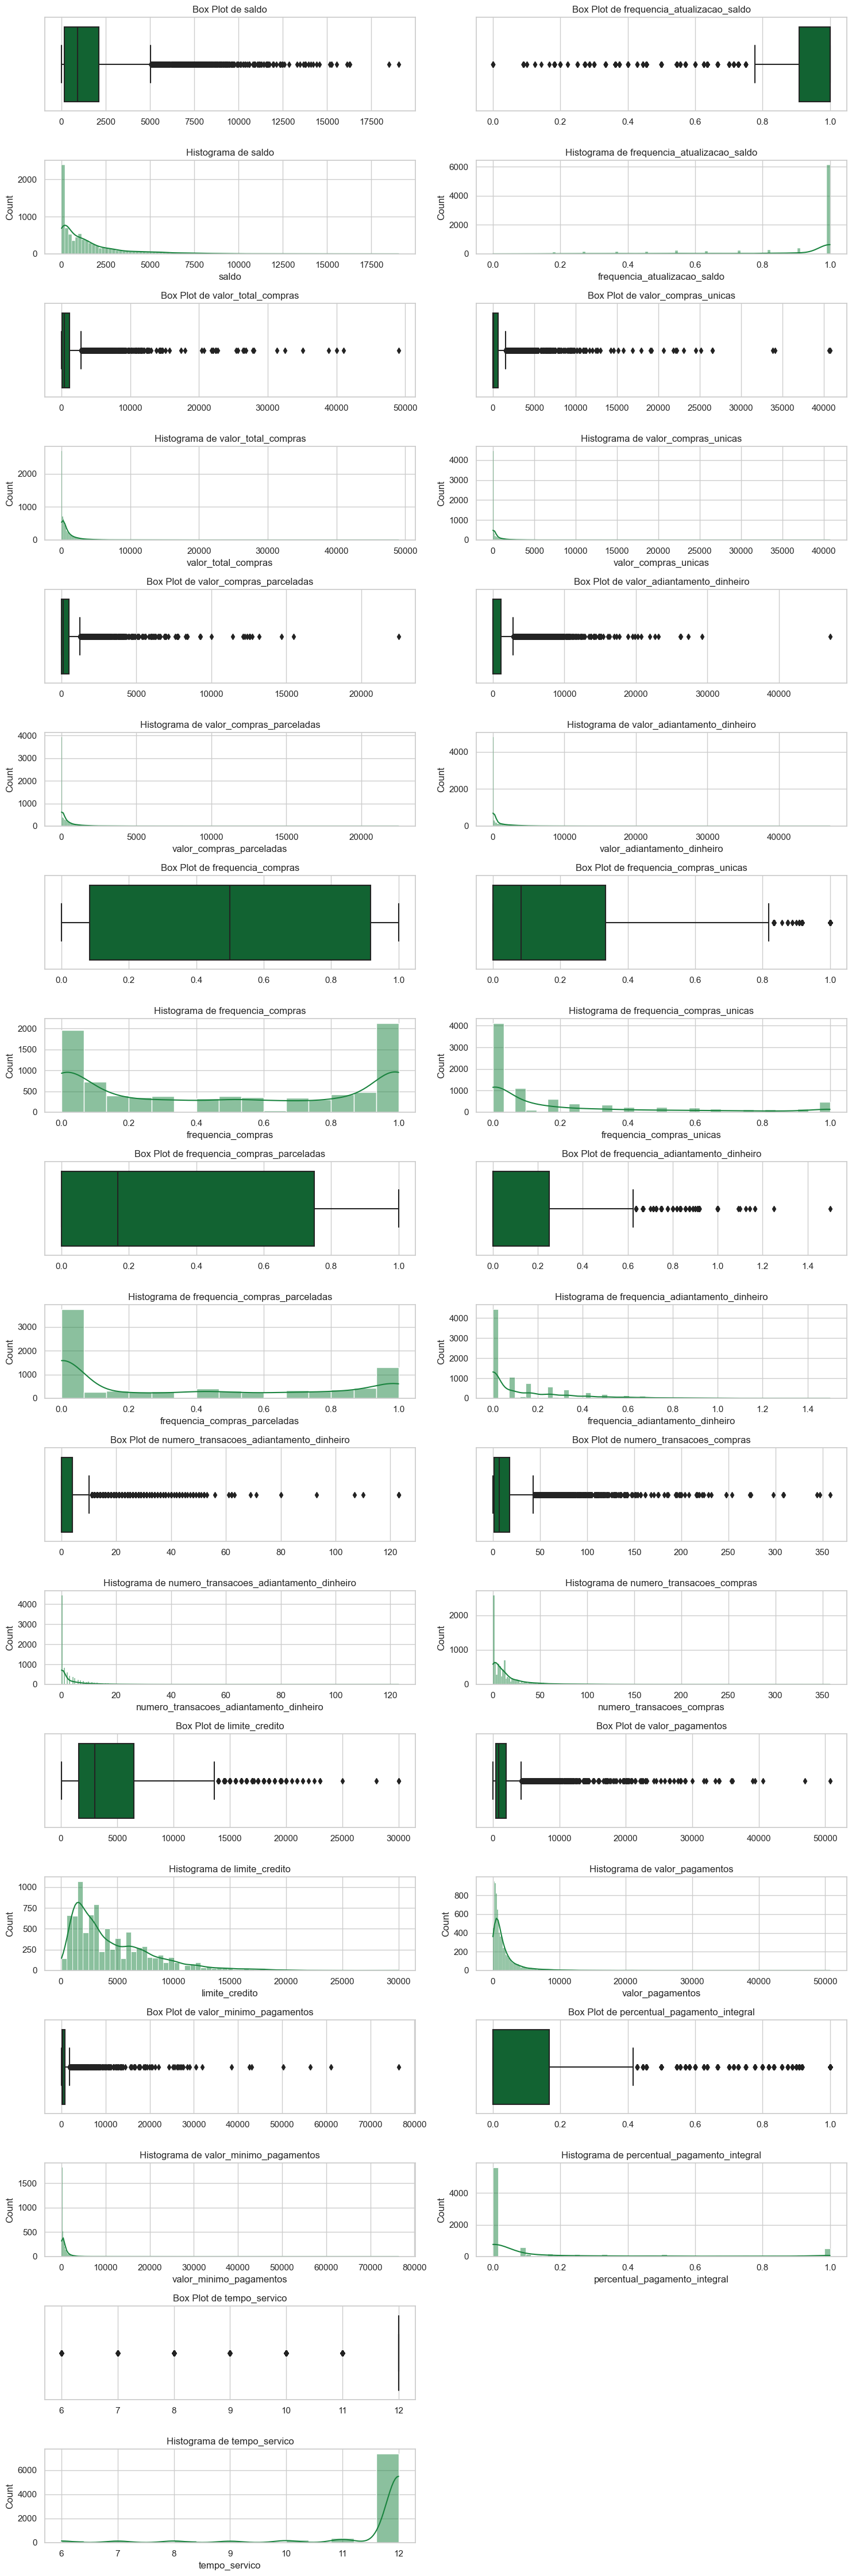

In [10]:
# Definindo a paleta de cores em tons de verde
green_palette_box = sns.color_palette("Greens_r")  # Paleta invertida para boxplots mais claros
green_palette_hist = sns.color_palette("Greens", as_cmap=True)  # Paleta normal para histogramas

# Selecionando as variáveis numéricas já processadas
colunas_numericas = df_numericas.columns

# Número de variáveis quantitativas
num_var = len(colunas_numericas)

# Determinando o número de linhas e colunas
num_cols = 2  # Dois gráficos por linha
num_rows = (num_var + num_cols - 1) // num_cols  # Calcula o número necessário de linhas, arredondado para cima

# Criando a figura e definindo o número de linhas e colunas para os subplots
fig, axes = plt.subplots(nrows=num_rows * 2, ncols=num_cols, figsize=(15, 5 * num_rows))  # Cada variável ocupa duas linhas

# Loop para plotar box plots e histogramas para cada variável numérica
for i, coluna in enumerate(colunas_numericas):
    row = (i // num_cols) * 2  # Encontra a linha base para o par de gráficos (boxplot e histograma)
    col = i % num_cols  # Encontra a coluna para o par de gráficos

    # Box plot na parte superior usando tons de verde
    sns.boxplot(data=df, x=coluna, ax=axes[row, col], orient='h', palette=green_palette_box)
    axes[row, col].set_title(f'Box Plot de {coluna}')
    axes[row, col].set_xlabel('')  # Limpar label de x se não necessário

    # Histograma diretamente abaixo do box plot, também em verde
    sns.histplot(df[coluna], kde=True, ax=axes[row + 1, col], color=green_palette_hist(200))
    axes[row + 1, col].set_title(f'Histograma de {coluna}')

# Removendo subplots vazios, se houver
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[(j // num_cols) * 2, j % num_cols])  # Remove o boxplot vazio
    fig.delaxes(axes[((j // num_cols) * 2) + 1, j % num_cols])  # Remove o histograma vazio

# Ajustando o layout para evitar sobreposição e melhorar a apresentação
plt.tight_layout()
plt.show()

---

#### 💡 Observações:

**Análise Gráfica das Variáveis Numéricas**:

- **Saldo Restante na Conta (`saldo`)**:
  - O boxplot mostra uma grande quantidade de outliers acima de **7.500**.
  - A distribuição é assimétrica positiva, com a maioria dos clientes possuindo saldos baixos e poucos com saldos elevados.

- **Frequência de Atualização do Saldo (`frequencia_atualizacao_saldo`)**:
  - A maior parte dos clientes possui frequência de atualização do saldo próxima de **1**, indicando que os saldos são frequentemente atualizados.
  - O histograma apresenta baixa dispersão, com valores concentrados próximos a **1**.

- **Valor Total de Compras (`valor_total_compras`)**:
  - A distribuição apresenta uma cauda longa, com a maioria dos clientes realizando compras de valores baixos.
  - O boxplot evidencia diversos outliers acima de **10.000**, indicando valores extremos no comportamento de consumo.

- **Valor de Compras Únicas (`valor_compras_unicas`)**:
  - Assim como o valor total de compras, a maioria dos clientes realiza compras únicas de valores baixos.
  - O boxplot destaca valores extremos superiores a **40.000**, indicando poucos casos de compras únicas de alto valor.

- **Valor de Compras Parceladas (`valor_compras_parceladas`)**:
  - A maioria dos valores está concentrada em **zero**, indicando que muitos clientes não realizam compras parceladas.
  - O histograma também reflete a concentração em valores baixos, com uma cauda longa. O boxplot apresenta outliers acima de **5.000**, mas eles são relativamente raros, indicando que compras parceladas altas não são uma característica predominante.

- **Adiantamento de Dinheiro (`valor_adiantamento_dinheiro`)**:
  - A distribuição é altamente assimétrica, com a maior parte dos clientes utilizando valores baixos ou nulos de adiantamento.
  - O boxplot revela outliers significativos acima de **10.000**, o que sugere clientes com comportamento atípico de utilização elevada de adiantamentos.

- **Frequência de Compras (`frequencia_compras`)**:
  - A distribuição é bimodal, com muitos clientes apresentando frequências próximas de **0** ou **1**, indicando dois grupos bem distintos: clientes que compram raramente e outros que compram frequentemente.

- **Número de Transações com Adiantamento de Dinheiro (`numero_transacoes_adiantamento_dinheiro`)**:
  - A maior parte dos clientes realiza poucas transações, com um pico próximo de **zero**.
  - Outliers notáveis acima de **50 transações** são observados no boxplot, indicando comportamentos fora do padrão.

- **Limite de Crédito (`limite_credito`)**:
  - A distribuição é assimétrica, com a maioria dos clientes concentrados em limites de até **10.000**.
  - O boxplot evidencia outliers significativos acima de **15.000**, indicando poucos clientes com limites excepcionalmente altos.

- **Valor Mínimo de Pagamentos (`valor_minimo_pagamentos`)**:
  - O histograma mostra uma alta concentração em valores baixos, com uma cauda longa que se estende até valores extremos.
  - Outliers notáveis acima de **50.000** são visíveis no boxplot, o que pode influenciar a análise.

- **Tempo de Serviço (`tempo_servico`)**:
  - Quase todos os clientes estão concentrados em **12 meses**, indicando que essa variável não possui grande variabilidade.
  - O boxplot reflete pouca dispersão, com a maioria dos valores agrupados.

**Conclusão**:
- A presença de **outliers** significativos em variáveis como `saldo`, `valor_total_compras`, e `valor_minimo_pagamentos` deve ser analisada com cuidado para evitar impacto negativo na clusterização.
- Variáveis como `tempo_servico` possuem baixa variabilidade e podem ter menor importância no processo de segmentação.
- Algumas variáveis, como `frequencia_compras`, apresentam padrões bimodais que podem ser importantes para identificar segmentos distintos de clientes.

---

### 5.2 Análise de Correlação <a id="5.2-análise-de-correlação"></a>
[Voltar à EDA](#5-análise-exploratória-de-dados-eda)

Nesta seção, investigaremos a correlação entre as variáveis numéricas do dataset. A análise de correlação nos permite identificar relações lineares entre as variáveis, o que é essencial para:

1. **Identificar Multicolinearidade**: Variáveis altamente correlacionadas podem conter informações redundantes e impactar algoritmos sensíveis à multicolinearidade.
2. **Entender Relações Entre Variáveis**: Detectar dependências ou padrões relevantes no comportamento dos clientes.
3. **Guiar a Seleção de Variáveis**: Focar em variáveis que sejam mais significativas para a segmentação e modelagem.

As etapas incluem:
- **Cálculo da Matriz de Correlação**: Utilizaremos o coeficiente de correlação de Pearson para medir a força e a direção das relações entre as variáveis numéricas.
- **Visualização com Mapa de Calor (Heatmap)**: Representaremos graficamente as correlações para facilitar a identificação de padrões e relações significativas.

Por fim, destacaremos as variáveis mais correlacionadas e discutiremos como essas relações podem influenciar as etapas subsequentes do projeto.

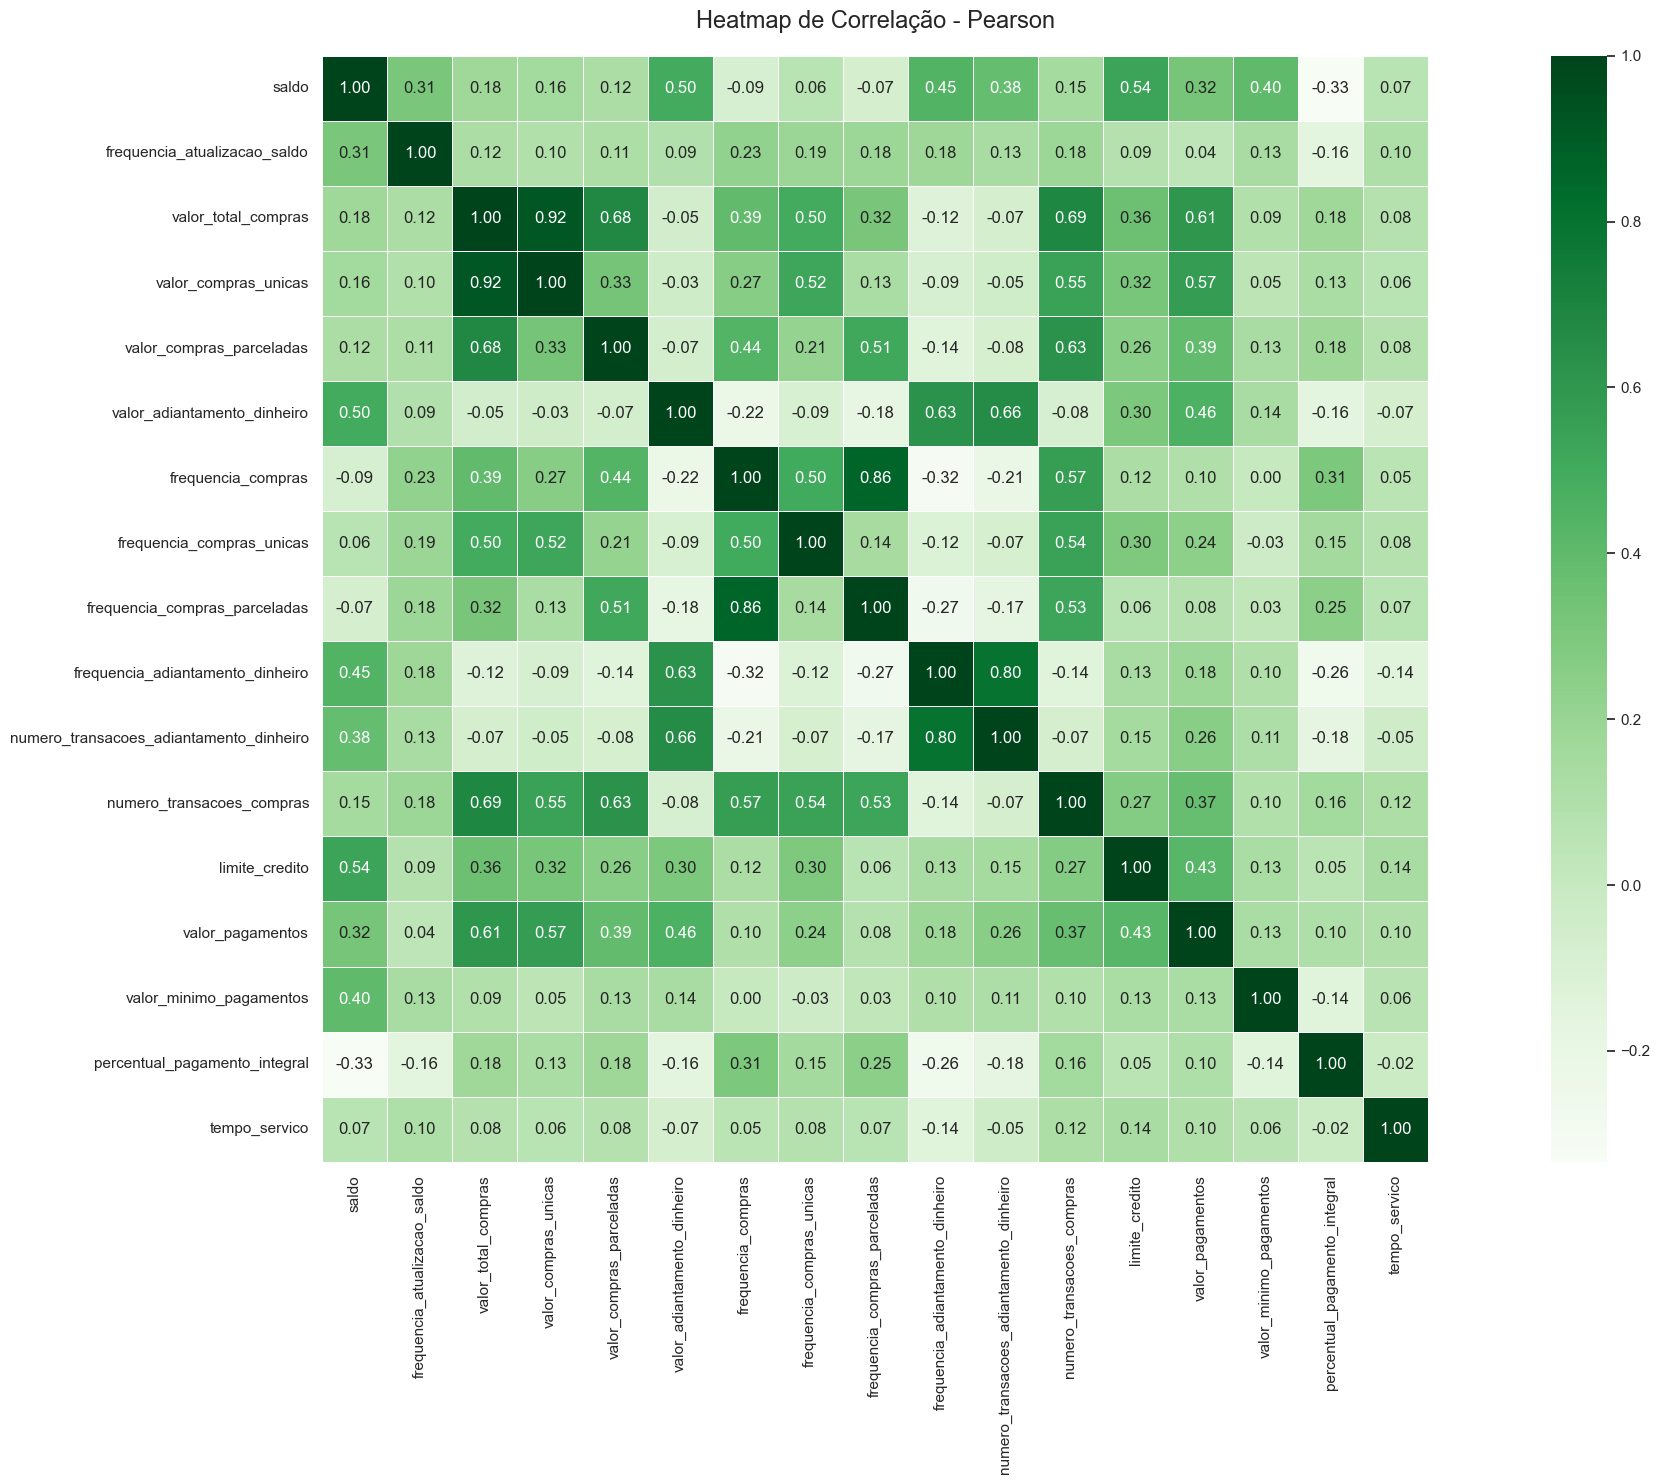

In [11]:
# Calculando a matriz de correlação com Pearson
matriz_correlacao = df_numericas.corr(method='pearson')

# Configurando o tamanho e estilo do gráfico
plt.figure(figsize=(25, 15))
sns.set(style="whitegrid")

# Criando o heatmap para a matriz de correlação
heatmap = sns.heatmap(
    matriz_correlacao,
    annot=True,  # Exibe os valores no heatmap
    fmt=".2f",  # Formato dos números
    cmap="Greens",  # Paleta de cores para o heatmap
    cbar=True,  # Adiciona barra de cores
    square=True,  # Mantém os quadrados simétricos
    linewidths=0.5,  # Espessura das linhas
)

# Títulos e ajustes
heatmap.set_title('Heatmap de Correlação - Pearson', fontsize=17, pad=20)
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X
plt.yticks(rotation=0)   # Mantém os rótulos do eixo Y na horizontal
plt.tight_layout()
plt.show()

In [12]:
# Definindo o limiar de correlação
limiar_correlacao = 0.6

# Calculando a matriz de correlação e transformando em formato longo
correlacoes_long = matriz_correlacao.unstack().reset_index()
correlacoes_long.columns = ['Variável 1', 'Variável 2', 'Correlação']

# Filtrando apenas as correlações acima do limiar, excluindo diagonais (self-correlation)
correlacoes_filtradas = correlacoes_long[
    (correlacoes_long['Correlação'].abs() >= limiar_correlacao) & 
    (correlacoes_long['Variável 1'] != correlacoes_long['Variável 2'])
]

# Ordenando pela força da correlação
correlacoes_filtradas = correlacoes_filtradas.sort_values(
    by='Correlação', key=lambda x: x.abs(), ascending=False
).reset_index(drop=True)

# Exibindo o DataFrame resultante
correlacoes_filtradas

,Variável 1,Variável 2,Correlação
0,valor_total_compras,valor_compras_unicas,0.916780
1,valor_compras_unicas,valor_total_compras,0.916780
2,frequencia_compras_parceladas,frequencia_compras,0.862338
3,frequencia_compras,frequencia_compras_parceladas,0.862338
4,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,0.799593
5,numero_transacoes_adiantamento_dinheiro,frequencia_adiantamento_dinheiro,0.799593
6,valor_total_compras,numero_transacoes_compras,0.688732
7,numero_transacoes_compras,valor_total_compras,0.688732
8,valor_compras_parceladas,valor_total_compras,0.679259
9,valor_total_compras,valor_compras_parceladas,0.679259


---

#### 💡 Observações:

**Análise de Correlação**:

- **Valor Total de Compras (`valor_total_compras`) e Compras Únicas (`valor_compras_unicas`)**:
  - Correlação de **0.92**, indicando que uma grande parte do valor total de compras é composta por compras únicas.
  - Esse comportamento sugere que muitos clientes preferem realizar transações maiores de forma esporádica, o que pode ser relevante para identificar clientes que priorizam compras específicas de alto valor.

- **Frequência de Compras Parceladas (`frequencia_compras_parceladas`) e Frequência Geral de Compras (`frequencia_compras`)**:
  - Correlação de **0.86**, mostrando que clientes que compram com frequência também realizam mais compras parceladas.
  - Esse padrão pode indicar que clientes com maior atividade financeira utilizam parcelamentos como estratégia de gerenciamento financeiro.

- **Frequência de Adiantamento de Dinheiro (`frequencia_adiantamento_dinheiro`) e Número de Transações com Adiantamento de Dinheiro (`numero_transacoes_adiantamento_dinheiro`)**:
  - Correlação de **0.80**, evidenciando que clientes que utilizam adiantamentos com frequência tendem a realizar mais transações nesse formato.
  - Isso sugere um perfil de cliente que pode estar em maior necessidade financeira ou utilizando adiantamentos como complemento à renda.

- **Valor Total de Compras (`valor_total_compras`) e Número de Transações de Compras (`numero_transacoes_compras`)**:
  - Correlação de **0.69**, indicando que um maior número de transações contribui para um valor total de compras mais alto.
  - Isso não significa que cada transação seja de alto valor, mas sim que clientes ativos em número de compras tendem a gastar mais.

- **Valor de Compras Parceladas (`valor_compras_parceladas`) e Valor Total de Compras (`valor_total_compras`)**:
  - Correlação de **0.68**, destacando a relevância das compras parceladas no total de compras.
  - Esse padrão pode ser explorado com ofertas promocionais para incentivar o uso de parcelamentos.

- **Valor de Adiantamento de Dinheiro (`valor_adiantamento_dinheiro`) com Número e Frequência de Transações de Adiantamento**:
  - Correlações de **0.66** e **0.63**, respectivamente.
  - Clientes que utilizam adiantamentos com frequência geralmente realizam transações maiores, o que pode indicar uma dependência financeira dessa funcionalidade.

- **Valor de Pagamentos (`valor_pagamentos`) e Valor Total de Compras (`valor_total_compras`)**:
  - Correlação de **0.61**, mostrando que clientes que gastam mais também tendem a realizar pagamentos maiores.
  - Isso pode refletir um bom comportamento financeiro, sendo um grupo de interesse para estratégias premium.

---

#### Conclusão:
- As correlações mais fortes ajudam a identificar grupos de clientes com comportamentos financeiros específicos, como:
  - Clientes que preferem compras únicas de alto valor.
  - Clientes que utilizam frequentemente parcelamentos e adiantamentos.
- Esses insights são importantes para direcionar as estratégias de segmentação e definir ofertas personalizadas.
- Algumas variáveis com baixa correlação, como `tempo_servico`, podem ter menor influência no processo de clusterização.

---

### 5.3 Análise de Outliers <a id="5.3-análise-de-outliers"></a>  
[Voltar à EDA](#5-análise-exploratória-de-dados-eda)

Nesta seção, realizaremos uma análise detalhada dos outliers presentes nas variáveis quantitativas. Outliers são valores que se afastam significativamente da distribuição central dos dados e podem impactar a qualidade da clusterização, dependendo de sua natureza e causa.

As etapas desta análise incluem:

1. **Identificação de Outliers**:  
   Utilizamos o método do **Intervalo Interquartil (IQR)** para identificar valores extremos em cada variável. O IQR é calculado como a diferença entre o 3º quartil (Q3) e o 1º quartil (Q1). Os limites inferior e superior para detecção de outliers são dados por:
   - Limite inferior: \( Q1 - 1.5 \times IQR \)
   - Limite superior: \( Q3 + 1.5 \times IQR \)

2. **Quantificação de Outliers por Variável**:  
   Geramos uma tabela para destacar o número e a proporção de outliers em relação ao total de registros para cada variável quantitativa.

3. **Impacto dos Outliers**:  
   Discutimos as variáveis com maior proporção de outliers, avaliando se esses valores extremos são representativos de comportamentos reais ou se podem distorcer os resultados da clusterização.

In [13]:
# Inicializando um dicionário para armazenar a quantidade de outliers para cada variável
outliers_info = {}

# Calculando os limites e contagem de outliers para cada variável quantitativa
for coluna in df_numericas.columns:
    # Calculando Q1, Q3 e IQR
    Q1 = df_numericas[coluna].quantile(0.25)
    Q3 = df_numericas[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Contando os outliers abaixo e acima dos limites
    outliers_abaixo = (df_numericas[coluna] < limite_inferior).sum()
    outliers_acima = (df_numericas[coluna] > limite_superior).sum()
    total_outliers = outliers_abaixo + outliers_acima

    # Armazenando os resultados no dicionário
    outliers_info[coluna] = {
        'Outliers Abaixo': outliers_abaixo,
        'Outliers Acima': outliers_acima,
        'Total de Outliers': total_outliers,
        'Percentual de Outliers (%)': (total_outliers / df_numericas.shape[0]) * 100
    }

# Convertendo o dicionário para um DataFrame para melhor visualização
tabela_outliers = pd.DataFrame(outliers_info).T

# Ordenando a tabela pelo percentual de outliers em ordem decrescente
tabela_outliers = tabela_outliers.sort_values(by='Percentual de Outliers (%)', ascending=False)

# Exibindo a tabela de frequência de outliers
tabela_outliers

,Outliers Abaixo,Outliers Acima,Total de Outliers,Percentual de Outliers (%)
frequencia_atualizacao_saldo,1511.0,0.0,1511.0,17.496526
percentual_pagamento_integral,0.0,1343.0,1343.0,15.551181
tempo_servico,1290.0,0.0,1290.0,14.937471
valor_adiantamento_dinheiro,0.0,977.0,977.0,11.313108
valor_compras_unicas,0.0,961.0,961.0,11.127837
valor_minimo_pagamentos,0.0,841.0,841.0,9.738305
valor_compras_parceladas,0.0,811.0,811.0,9.390922
numero_transacoes_adiantamento_dinheiro,0.0,794.0,794.0,9.194071
valor_pagamentos,0.0,785.0,785.0,9.089856
valor_total_compras,0.0,768.0,768.0,8.893006


In [14]:
# Calculando os limites inferior e superior de outliers para cada variável quantitativa
faixas_outliers = {}

for coluna in df_numericas.columns:
    # Calculando Q1, Q3 e IQR
    Q1 = df_numericas[coluna].quantile(0.25)
    Q3 = df_numericas[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Armazenando os limites e valores estatísticos
    faixas_outliers[coluna] = {
        'Q1': Q1,
        'Q3': Q3,
        'Limite Inferior': limite_inferior,
        'Limite Superior': limite_superior,
        'Mínimo': df_numericas[coluna].min(),
        'Máximo': df_numericas[coluna].max()
    }

# Convertendo o dicionário para DataFrame para visualização
df_faixas_outliers = pd.DataFrame(faixas_outliers).T

# Exibindo a faixa de valores dos outliers
df_faixas_outliers

,Q1,Q3,Limite Inferior,Limite Superior,Mínimo,Máximo
saldo,148.095189,2105.195853,-2787.555807,5040.846849,0.000000,19043.13856
frequencia_atualizacao_saldo,0.909091,1.000000,0.772728,1.136364,0.000000,1.00000
valor_total_compras,43.367500,1145.980000,-1610.551250,2799.898750,0.000000,49039.57000
valor_compras_unicas,0.000000,599.100000,-898.650000,1497.750000,0.000000,40761.25000
valor_compras_parceladas,0.000000,484.147500,-726.221250,1210.368750,0.000000,22500.00000
valor_adiantamento_dinheiro,0.000000,1132.385490,-1698.578235,2830.963725,0.000000,47137.21176
frequencia_compras,0.083333,0.916667,-1.166668,2.166668,0.000000,1.00000
frequencia_compras_unicas,0.000000,0.333333,-0.499999,0.833333,0.000000,1.00000
frequencia_compras_parceladas,0.000000,0.750000,-1.125000,1.875000,0.000000,1.00000
frequencia_adiantamento_dinheiro,0.000000,0.250000,-0.375000,0.625000,0.000000,1.50000


---

#### 💡 **Observações**:

**1. Frequência de Atualização do Saldo (`frequencia_atualizacao_saldo`)**:
- **Outliers Abaixo**: 17,5% dos registros (1.511 clientes) apresentam frequências significativamente menores que o intervalo normal. Este comportamento pode indicar clientes com baixa movimentação na conta ou irregularidade no uso.
- **Impacto no Negócio**: Esses clientes podem ser menos engajados com o serviço, representando um segmento de baixo uso.

**2. Percentual de Pagamento Integral (`percentual_pagamento_integral`)**:
- **Outliers Acima**: 15,6% dos registros indicam clientes com percentuais muito altos de pagamento integral.
- **Impacto no Negócio**: Esses valores podem ser clientes de menor risco financeiro, pois pagam o saldo total frequentemente. Outliers aqui podem ser positivos.

**3. Tempo de Serviço (`tempo_servico`)**:
- **Outliers Abaixo**: 14,9% dos registros indicam clientes com tempo de serviço inferior ao limite inferior (6 meses).
- **Impacto no Negócio**: Clientes com pouco tempo de serviço podem ser novos e ainda não apresentaram um histórico robusto para análises.

**4. Adiantamento de Dinheiro (`valor_adiantamento_dinheiro`)**:
- **Outliers Acima**: 11,3% dos clientes apresentam valores muito elevados de adiantamento de dinheiro.
- **Impacto no Negócio**: Clientes que utilizam frequentemente o adiantamento de dinheiro podem representar maior lucratividade, mas também maior risco.

**5. Compras Únicas (`valor_compras_unicas`)**:
- **Outliers Acima**: 11,1% dos clientes realizam compras únicas de valores consideravelmente elevados.
- **Impacto no Negócio**: Estes clientes podem ser um segmento de alto valor, mas os valores extremos podem influenciar a análise de clusterização.

**6. Compras Parceladas (`valor_compras_parceladas`)**:
- **Outliers Acima**: 9,9% dos clientes realizam compras parceladas de valores extremamente altos.
- **Impacto no Negócio**: Este comportamento sugere um segmento que pode ser mais propenso a financiar compras, relevante para estratégias de crédito.

**7. Limite de Crédito (`limite_credito`)**:
- **Outliers Acima**: Apenas 2,8% dos clientes apresentam limites de crédito extremamente elevados.
- **Impacto no Negócio**: Embora raros, esses clientes podem ser prioritários para estratégias exclusivas, como produtos premium.

**8. Tempo de Serviço (`tempo_servico`)**:
- **Baixa Variabilidade**: Os outliers estão concentrados abaixo de 6 meses, reforçando que poucos clientes possuem um tempo de uso atípico.
- **Impacto no Negócio**: Esse dado pode influenciar pouco na segmentação, pois a maioria dos clientes tem um tempo de serviço homogêneo.

---

#### Discussão:

- **Presença de Outliers Significativos**: As variáveis relacionadas a valores financeiros (`valor_compras_unicas`, `valor_compras_parceladas`, `valor_pagamentos`) e limites de crédito apresentam uma proporção notável de outliers. Esses valores podem ser legítimos e representar comportamentos atípicos mas importantes no negócio.

- **Ação Sobre Outliers**:
  1. **Manter Outliers Positivos**: Variáveis como `valor_compras_unicas` e `percentual_pagamento_integral` podem trazer informações sobre clientes de alto valor e baixo risco.
  2. **Tratar Outliers Negativos**: Valores baixos em `frequencia_atualizacao_saldo` e `tempo_servico` podem indicar perfis desengajados ou novos, requerendo ajustes para não influenciar negativamente os modelos.
  3. **Avaliar Segmentos Específicos**: É possível criar grupos segmentados para clientes com uso elevado de adiantamento e limites de crédito, focando em estratégias personalizadas.

- **Próximos Passos**:
  - Decidir entre remoção, transformação (log ou winsorização) ou manutenção dos outliers com base no impacto observado.
  - Verificar a influência dos outliers nos resultados da clusterização, evitando viés excessivo no agrupamento.

---

---

#### 💡 Decisão Sobre os Outliers:

Com base na análise realizada, decidimos **manter os outliers na base de dados** neste momento, por mais que representem valores extremos. Essa decisão se baseia no seguinte raciocínio:

- **Contexto de Negócio**:
  - Os outliers podem refletir comportamentos específicos de segmentos importantes de clientes, como clientes de alto valor ou clientes com uso atípico do cartão de crédito.
  - Removê-los neste estágio poderia comprometer a interpretação dos clusters e a identificação de padrões de comportamento relevantes.

- **Próximos Passos**:
  - Verificar o impacto dos outliers nos resultados ao rodar os estimadores de clusterização.
  - Caso os outliers prejudiquem a formação ou interpretação dos clusters, retornaremos a esta etapa para realizar transformações ou exclusões específicas.

Esta abordagem mantém os dados o mais completo possível, permitindo uma análise inicial mais abrangente.

---

### 5.4 Conclusões da EDA <a id="5.4-conclusões-da-eda"></a>
[Voltar à EDA](#5-análise-exploratória-de-dados-eda)

---

Após realizar a Análise Exploratória de Dados (EDA), chegamos às seguintes conclusões e constatações relevantes para o projeto:

#### 💡 Características Gerais das Variáveis:

1. **Natureza Predominantemente Numérica**:
   - A maior parte das variáveis no dataset é quantitativa e está relacionada a comportamentos financeiros dos clientes, como gastos, pagamentos e limites de crédito. Isso reforça a importância de entender a distribuição e as relações entre essas variáveis para segmentar adequadamente os clientes.

2. **Presença de Outliers**:
   - Diversas variáveis apresentam outliers significativos, como `valor_total_compras`, `valor_adiantamento_dinheiro` e `limite_credito`. Esses outliers podem representar comportamentos específicos de clientes, como usuários de alto gasto ou uso atípico do cartão. Optamos por mantê-los para preservar a integridade do comportamento real dos clientes.

3. **Distribuição Assimétrica**:
   - Variáveis como `saldo` e `valor_pagamentos` têm distribuições assimétricas positivas, o que indica que a maioria dos clientes possui valores baixos, enquanto poucos têm valores muito altos. Essa característica será importante ao identificar clusters de clientes diferenciados.

#### 💡 Relações Entre Variáveis:

4. **Alta Correlação em Variáveis de Compras**:
   - As variáveis `valor_total_compras`, `valor_compras_unicas` e `valor_compras_parceladas` apresentam correlações muito altas entre si, indicando que essas medidas estão fortemente relacionadas e capturam comportamentos semelhantes.

5. **Uso de Adiantamentos**:
   - Há uma forte relação entre `frequencia_adiantamento_dinheiro` e `numero_transacoes_adiantamento_dinheiro`, bem como com `valor_adiantamento_dinheiro`. Isso sugere que clientes que realizam transações frequentes de adiantamento tendem a movimentar valores altos. Esse comportamento pode identificar clientes em situações financeiras mais críticas ou com padrões de uso específicos.

6. **Comportamentos de Pagamento**:
   - Variáveis como `valor_minimo_pagamentos` e `percentual_pagamento_integral` destacam comportamentos financeiros distintos, como clientes que realizam pagamentos mínimos ou integram totalmente suas dívidas.

#### 💡 Implicações para o Negócio:

7. **Segmentação Relevante**:
   - As diferenças claras nos padrões de compras, pagamentos e limites de crédito indicam que existem grupos de clientes com comportamentos bem distintos. Esses padrões podem ser explorados na próxima etapa de clusterização para criar segmentos que permitam estratégias de marketing direcionadas.

8. **Uso Estratégico dos Outliers**:
   - Apesar de serem valores extremos, os outliers podem representar clientes de alto valor ou comportamentos atípicos que merecem atenção especial. Por isso, manteremos esses dados na análise inicial.

9. **Variáveis Potencialmente Redundantes**:
   - As altas correlações observadas entre algumas variáveis, como as relacionadas a compras, podem indicar redundância. Esse fator será avaliado durante a clusterização para evitar sobreposição de informações.

---

Estas conclusões fundamentam a próxima etapa do projeto, que será focada na segmentação dos clientes por meio de algoritmos de clusterização. A análise conduzida até aqui fornece uma base sólida para entender as características e comportamentos que definirão os clusters.

## 6. Análise de Segmentação (Clusterização) 🔍 <a id="6-análise-de-segmentação-clusterização"></a>
[Voltar ao Sumário](#sumário)

Nesta seção, realizamos a análise de segmentação dos clientes utilizando técnicas de clusterização. O objetivo é identificar grupos distintos de clientes com características e comportamentos semelhantes, fornecendo insights valiosos para personalização de estratégias de marketing e melhorias no relacionamento com os clientes.

### [6.1 Contexto e Objetivo da Segmentação](#6.1-contexto-e-objetivo-da-segmentação)
Definimos o objetivo principal da clusterização, explicando como a segmentação dos clientes pode ser usada para gerar valor ao negócio. Exploramos como os clusters podem destacar padrões de comportamento, como uso de crédito, adiantamentos e frequência de compras.

### [6.2 Pré-Processamento para Clusterização](#6.2-pré-processamento-para-clusterização)
Preparamos os dados para a clusterização, garantindo que estejam normalizados e otimizados para os algoritmos. Removemos variáveis redundantes, verificamos alta correlação e consideramos a aplicação de redução de dimensionalidade, como PCA.

### [6.3 Determinação do Número de Clusters](#6.3-determinação-do-número-de-clusters)
Utilizamos métricas e métodos como o Elbow Method, Silhouette Score e Calinski-Harabasz Index para determinar o número ideal de clusters, justificando nossa escolha com base em visualizações e valores obtidos.

### [6.4 Aplicação de Algoritmos de Clusterização](#6.4-aplicação-de-algoritmos-de-clusterização)
Aplicamos diferentes algoritmos de clusterização, como K-Means, Hierarchical Clustering e DBSCAN, para identificar padrões distintos e avaliar a melhor abordagem para o problema.

### [6.5 Interpretação dos Clusters](#6.5-interpretação-dos-clusters)
Interpretamos os clusters gerados, descrevendo o perfil de cada grupo com base em variáveis-chave. Utilizamos visualizações como gráficos de barras e boxplots para destacar as características mais relevantes de cada segmento.

### [6.6 Discussão e Estratégias de Negócio](#6.6-discussão-e-estratégias-de-negócio)
Discutimos os insights obtidos com os clusters e propomos estratégias práticas para o negócio, como campanhas de marketing direcionadas e ações de retenção. Avaliamos a necessidade de ajustes nos clusters ou aprofundamento em etapas futuras.

### 6.1 Contexto e Objetivo da Segmentação <a id="6.1-contexto-e-objetivo-da-segmentação"></a>
[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)

Nesta seção, apresentamos o contexto do negócio e os objetivos gerais da clusterização no dataset de clientes de cartão de crédito. A clusterização será aplicada para identificar padrões de comportamento entre os clientes, ajudando a personalizar estratégias de marketing e melhorar o atendimento ao cliente.

#### Contexto do Negócio:
O mercado de cartões de crédito é altamente competitivo, e compreender o comportamento dos clientes é essencial para a retenção e engajamento. Segmentar os clientes com base em seu comportamento permite:
- **Personalizar campanhas de marketing**: Oferecer produtos ou benefícios alinhados às necessidades de cada grupo.
- **Aumentar a satisfação do cliente**: Adaptar as estratégias para atender às expectativas de cada segmento.
- **Otimizar recursos**: Direcionar investimentos em marketing para os grupos mais promissores.

#### Objetivo Geral:
O objetivo da clusterização neste projeto é identificar grupos de clientes com padrões semelhantes de comportamento financeiro e de consumo. Esses grupos podem ser usados para:
- **Criar campanhas direcionadas** com base em características como frequência de compras, uso de parcelamento ou adiantamentos.
- **Propor estratégias de retenção** para clientes com maior risco de desengajamento.
- **Descobrir padrões inusitados** que possam sugerir novos nichos de mercado.

#### Expectativas Generalistas:
A análise exploratória realizada no item anterior indicou alguns comportamentos que podem ser investigados na clusterização:
- Grupos com alta frequência de compras e limite elevado de crédito.
- Clientes que utilizam adiantamentos de forma intensa e frequente.
- Clientes que realizam apenas o pagamento mínimo e possuem valores altos de saldo.

Essas são apenas hipóteses iniciais, e o processo de clusterização será exploratório. A interpretação dos clusters encontrados será fundamental para determinar estratégias específicas alinhadas ao negócio.

---


### **6.2 Pré-Processamento para Clusterização 🔄** <a id="6.2-pré-processamento-para-clusterização"></a>
[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)

Nesta etapa, preparamos os dados para a aplicação dos algoritmos de clusterização, garantindo que estejam ajustados às necessidades do modelo. O pré-processamento foca na seleção, transformação e tratamento das variáveis para potencializar a formação de clusters coesos e interpretáveis.

As etapas incluem:

1. **Seleção de Variáveis Relevantes**:
   - Utilizamos abordagens baseadas em análise exploratória e ferramentas estatísticas, como o **SelectKBest**, para identificar as variáveis mais relevantes para a segmentação.
   - Variáveis com alta correlação foram analisadas cuidadosamente, considerando seu impacto no contexto de negócios antes de possíveis remoções.

2. **Normalização ou Padronização**:
   - Garantimos que todas as variáveis estejam na mesma escala, aplicando técnicas como o **StandardScaler**.
   - Isso evita que variáveis com magnitudes maiores dominem o processo de clusterização.

3. **Exploração de Técnicas de Redução de Dimensionalidade (Opcional)**:
   - **PCA (Principal Component Analysis)** foi avaliado para reduzir a dimensionalidade dos dados, focando em componentes que expliquem a maior parte da variabilidade dos dados.
   - Essa abordagem é útil para melhorar a separação inicial dos clusters, mas ponderamos seu impacto na interpretação dos resultados.

O pré-processamento é uma etapa crítica para equilibrar a robustez estatística dos modelos e a interpretabilidade prática dos clusters no contexto empresarial. A escolha final das variáveis e das técnicas será ajustada com base nos resultados das análises subsequentes.

In [15]:
# ---------------------------------------------------------------
# Etapa 1: Seleção de Variáveis Importantes para a Clusterização
# ---------------------------------------------------------------

# Justificativa:
# - Selecionar variáveis relevantes para clusterização sem introduzir dependência de labels.
# - Evitar redundâncias e ruídos no modelo.

# 1. Excluir colunas não relevantes (como identificadores únicos)
# Identificadores únicos não contribuem para a análise de clusterização.
df_clusterizacao = df.drop(columns=['id_cliente'])

# Verificar as dimensões iniciais e as colunas disponíveis
print("Dimensões iniciais do DataFrame:", df_clusterizacao.shape)
print("Colunas disponíveis para análise inicial:", list(df_clusterizacao.columns))

# 2. Aplicar VarianceThreshold para remover variáveis com baixa variância
# Definimos um limiar mínimo para variância. Variáveis com valores constantes ou quase constantes serão removidas.
variancia_minima = 0.01  # Ajustar conforme necessário
seletor_variancia = VarianceThreshold(threshold=variancia_minima)
dados_variancia = seletor_variancia.fit_transform(df_clusterizacao)

# Recuperar os nomes das variáveis restantes após aplicar VarianceThreshold
variaveis_variancia = df_clusterizacao.columns[seletor_variancia.get_support()]
print("\nVariáveis selecionadas com base na variância mínima:", variaveis_variancia.tolist())

# 3. Analisar correlação entre variáveis restantes
# A matriz de correlação será utilizada para identificar redundâncias entre variáveis.
correlacao = pd.DataFrame(dados_variancia, columns=variaveis_variancia).corr().abs()

# Identificar pares de variáveis com alta correlação (> 0.9)
pares_correlacionados = (
    correlacao.where(np.triu(np.ones(correlacao.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
pares_correlacionados.columns = ['Variável 1', 'Variável 2', 'Correlação']
pares_correlacionados = pares_correlacionados[pares_correlacionados['Correlação'] > 0.9]

print("\nPares de variáveis com alta correlação (> 0.9):")
print(pares_correlacionados)

# 4. Decisão sobre remoção de variáveis redundantes
# Variáveis redundantes serão removidas com base em sua relevância para o negócio.
variaveis_redundantes = pares_correlacionados['Variável 2'].unique()
variaveis_finais = [var for var in variaveis_variancia if var not in variaveis_redundantes]

print("\nVariáveis finais após remoção de redundâncias:")
print(variaveis_finais)

# Criar um novo DataFrame apenas com as variáveis finais
df_clusterizacao_selecionada = df_clusterizacao[variaveis_finais]

# Verificar as dimensões finais do DataFrame selecionado
print("\nDimensões finais do DataFrame para clusterização:", df_clusterizacao_selecionada.shape)

# Exibir as primeiras linhas do DataFrame resultante
df_clusterizacao_selecionada.head()

Dimensões iniciais do DataFrame: (8636, 17)
Colunas disponíveis para análise inicial: ['saldo', 'frequencia_atualizacao_saldo', 'valor_total_compras', 'valor_compras_unicas', 'valor_compras_parceladas', 'valor_adiantamento_dinheiro', 'frequencia_compras', 'frequencia_compras_unicas', 'frequencia_compras_parceladas', 'frequencia_adiantamento_dinheiro', 'numero_transacoes_adiantamento_dinheiro', 'numero_transacoes_compras', 'limite_credito', 'valor_pagamentos', 'valor_minimo_pagamentos', 'percentual_pagamento_integral', 'tempo_servico']

Variáveis selecionadas com base na variância mínima: ['saldo', 'frequencia_atualizacao_saldo', 'valor_total_compras', 'valor_compras_unicas', 'valor_compras_parceladas', 'valor_adiantamento_dinheiro', 'frequencia_compras', 'frequencia_compras_unicas', 'frequencia_compras_parceladas', 'frequencia_adiantamento_dinheiro', 'numero_transacoes_adiantamento_dinheiro', 'numero_transacoes_compras', 'limite_credito', 'valor_pagamentos', 'valor_minimo_pagamentos', 

,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_parceladas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_compras_parceladas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,valor_pagamentos,valor_minimo_pagamentos,percentual_pagamento_integral,tempo_servico
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [16]:
# ----------------------------------------
# Etapa 2: Normalização dos Dados
# ----------------------------------------

# Justificativa:
# - A normalização garante que todas as variáveis tenham o mesmo peso no cálculo das distâncias.
# - Sem a normalização, variáveis com valores maiores podem dominar o processo de clusterização.

# Inicializando o StandardScaler para padronizar os dados
scaler = StandardScaler()

# Aplicando a normalização apenas às variáveis selecionadas da Etapa 1
dados_normalizados = scaler.fit_transform(df_clusterizacao_selecionada)

# Convertendo o resultado de volta para um DataFrame com os mesmos nomes de colunas
df_normalizado = pd.DataFrame(dados_normalizados, columns=df_clusterizacao_selecionada.columns)

# Exibindo as primeiras linhas do DataFrame após a normalização
print("Primeiras linhas do DataFrame após a normalização:")
print(df_normalizado.head())

# Salvando o DataFrame normalizado para uso em etapas futuras
df_pronto_clusterizacao = df_normalizado.copy()

# Verificando as estatísticas descritivas para confirmar a normalização
print("\nEstatísticas descritivas do DataFrame normalizado:")
df_normalizado.describe()

Primeiras linhas do DataFrame após a normalização:
      saldo  frequencia_atualizacao_saldo  valor_total_compras  \
0 -0.744625                     -0.370047            -0.429184   
1  0.764152                      0.067679            -0.473208   
2  0.426602                      0.505405            -0.116413   
3 -0.373910                      0.505405            -0.465825   
4  0.099551                      0.505405             0.142062   

   valor_compras_parceladas  valor_adiantamento_dinheiro  frequencia_compras  \
0                 -0.354826                    -0.468655           -0.820769   
1                 -0.458839                     2.568556           -1.236139   
2                 -0.458839                    -0.468655            1.256077   
3                 -0.458839                    -0.468655           -1.028455   
4                  0.994815                    -0.468655            0.425339   

   frequencia_compras_unicas  frequencia_compras_parceladas  \
0       

,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_parceladas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_compras_parceladas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,valor_pagamentos,valor_minimo_pagamentos,percentual_pagamento_integral,tempo_servico
count,8636.000000,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03,8.636000e+03
mean,0.000000,-3.422716e-16,1.151876e-17,-2.797412e-17,-4.278395e-17,6.582147e-18,-3.291073e-18,8.227683e-18,2.468305e-17,2.715136e-17,-1.151876e-17,1.118965e-16,-2.632859e-17,-4.442949e-17,5.923932e-17,9.215005e-17
std,1.000058,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-0.764144,-4.309583e+00,-4.732082e-01,-4.588390e-01,-4.686555e-01,-1.236139e+00,-6.862796e-01,-9.265216e-01,-6.819525e-01,-4.794369e-01,-5.970542e-01,-1.222207e+00,-6.132812e-01,-3.643042e-01,-5.377269e-01,-4.221800e+00
25%,-0.693469,6.767893e-02,-4.531953e-01,-4.588390e-01,-4.686555e-01,-1.028455e+00,-6.862796e-01,-9.265216e-01,-6.819525e-01,-4.794369e-01,-5.573385e-01,-7.985975e-01,-4.694457e-01,-2.930083e-01,-5.377269e-01,3.551807e-01
50%,-0.326598,5.054046e-01,-2.999696e-01,-3.554965e-01,-4.686555e-01,9.968862e-03,-4.085365e-01,-5.078338e-01,-6.819525e-01,-4.794369e-01,-3.190448e-01,-4.159823e-01,-3.051243e-01,-2.326108e-01,-5.377269e-01,3.551807e-01
75%,0.240507,5.054046e-01,5.562856e-02,6.901931e-02,6.515234e-02,1.048393e+00,4.246962e-01,9.575697e-01,5.570222e-01,9.925796e-02,1.178270e-01,5.405558e-01,5.727990e-02,-1.635812e-02,2.485496e-02,3.551807e-01
max,8.323708,5.054046e-01,2.215714e+01,2.407255e+01,2.175188e+01,1.256077e+00,2.646651e+00,1.585600e+00,6.751896e+00,1.731543e+01,1.362114e+01,6.963026e+00,1.681891e+01,3.184159e+01,2.837758e+00,3.551807e-01


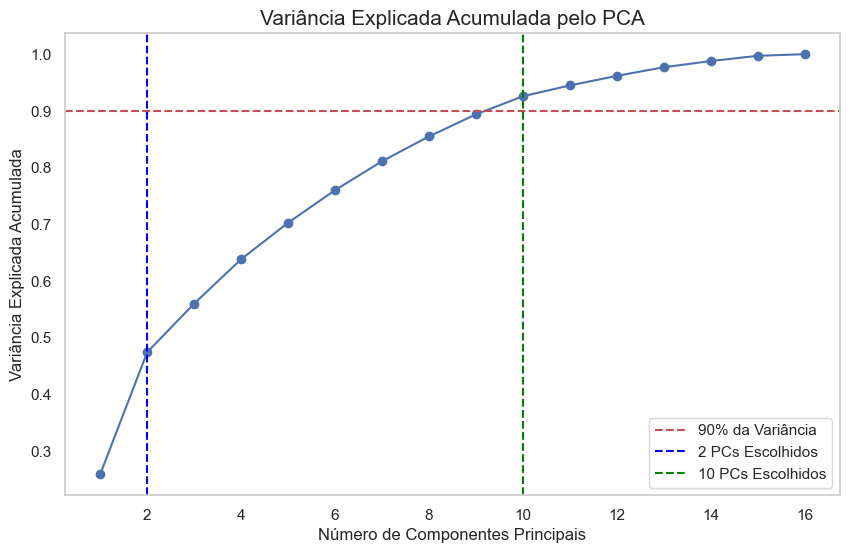

Resultados com 2 PCs:
Silhouette Score: 0.40127558368519695
Davies-Bouldin Index: 0.793780208581647
Calinski-Harabasz Index: 5859.650101792465

Resultados com 10 PCs:
Silhouette Score: 0.22147767005705474
Davies-Bouldin Index: 1.3604759670529498
Calinski-Harabasz Index: 1624.6824475257908

Comparação entre 2 PCs e 10 PCs:
2 PCs apresentam melhor Silhouette Score, indicando melhor separação dos clusters.
2 PCs apresentam menor Davies-Bouldin Index, indicando maior compactação dos clusters.
2 PCs apresentam maior Calinski-Harabasz Index, indicando melhor densidade e separação dos clusters.


In [17]:
# ------------------------------------------------
# Etapa 3: Aplicação do PCA (Redução de Dimensionalidade)
# ------------------------------------------------

# Justificativa:
# - O PCA é utilizado para reduzir a dimensionalidade, melhorando a separação entre clusters.

# - Comparar 2 PCs e 10 PCs em termos de desempenho nos clusters gerados.
# - Avaliar métricas de clusterização para validar a escolha dos componentes.

# Aplicação do PCA para todos os componentes
pca = PCA()
pca.fit(df_normalizado)

# Calculando a variância explicada acumulada
variancia_explicada_acumulada = pca.explained_variance_ratio_.cumsum()

# Exibindo a variância explicada acumulada para todos os componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variancia_explicada_acumulada) + 1), variancia_explicada_acumulada, marker='o')
plt.title('Variância Explicada Acumulada pelo PCA', fontsize=15)
plt.xlabel('Número de Componentes Principais', fontsize=12)
plt.ylabel('Variância Explicada Acumulada', fontsize=12)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% da Variância')
plt.axvline(x=2, color='blue', linestyle='--', label='2 PCs Escolhidos')
plt.axvline(x=10, color='green', linestyle='--', label='10 PCs Escolhidos')
plt.legend()
plt.grid()
plt.show()

# Determinando os dados transformados para 2 PCs e 10 PCs
pca_2 = PCA(n_components=2)
dados_pca_2 = pca_2.fit_transform(df_normalizado)

pca_10 = PCA(n_components=10)
dados_pca_10 = pca_10.fit_transform(df_normalizado)

# -------------------------------------------------------
# Comparando o Desempenho com K-Means (2 PCs vs 10 PCs)
# -------------------------------------------------------

# Inicializando o K-Means
kmeans_2 = KMeans(n_clusters=5, random_state=42)
kmeans_10 = KMeans(n_clusters=5, random_state=42)

# Ajustando os modelos
labels_2 = kmeans_2.fit_predict(dados_pca_2)
labels_10 = kmeans_10.fit_predict(dados_pca_10)

# Calculando as métricas para 2 PCs
silhouette_2 = silhouette_score(dados_pca_2, labels_2)
davies_bouldin_2 = davies_bouldin_score(dados_pca_2, labels_2)
calinski_harabasz_2 = calinski_harabasz_score(dados_pca_2, labels_2)

# Calculando as métricas para 10 PCs
silhouette_10 = silhouette_score(dados_pca_10, labels_10)
davies_bouldin_10 = davies_bouldin_score(dados_pca_10, labels_10)
calinski_harabasz_10 = calinski_harabasz_score(dados_pca_10, labels_10)

# -------------------------------------------------------
# Exibindo os Resultados
# -------------------------------------------------------

print("Resultados com 2 PCs:")
print(f"Silhouette Score: {silhouette_2}")
print(f"Davies-Bouldin Index: {davies_bouldin_2}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_2}")

print("\nResultados com 10 PCs:")
print(f"Silhouette Score: {silhouette_10}")
print(f"Davies-Bouldin Index: {davies_bouldin_10}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_10}")

# -------------------------------------------------------
# Justificando a Escolha com Base nos Resultados
# -------------------------------------------------------

# Comparando os resultados para justificar a escolha
print("\nComparação entre 2 PCs e 10 PCs:")
if silhouette_2 > silhouette_10:
    print("2 PCs apresentam melhor Silhouette Score, indicando melhor separação dos clusters.")
else:
    print("10 PCs apresentam melhor Silhouette Score, indicando melhor separação dos clusters.")

if davies_bouldin_2 < davies_bouldin_10:
    print("2 PCs apresentam menor Davies-Bouldin Index, indicando maior compactação dos clusters.")
else:
    print("10 PCs apresentam menor Davies-Bouldin Index, indicando maior compactação dos clusters.")

if calinski_harabasz_2 > calinski_harabasz_10:
    print("2 PCs apresentam maior Calinski-Harabasz Index, indicando melhor densidade e separação dos clusters.")
else:
    print("10 PCs apresentam maior Calinski-Harabasz Index, indicando melhor densidade e separação dos clusters.")

---

#### 💡 **Observações:**

#### **1. Seleção de Variáveis**:
- Excluímos a variável `id_cliente`, que não é relevante para a análise de comportamento.
- Mantivemos variáveis-chave como `valor_compras_parceladas` e `frequencia_compras`, que têm impacto direto no contexto de negócios.
- Após análise de correlação:
  - Identificamos uma correlação alta (> 0.9) entre `valor_total_compras` e `valor_compras_unicas`.
  - Removemos `valor_compras_unicas`, mantendo `valor_total_compras` por ser mais abrangente.
- **Dimensões finais após seleção e remoção de redundâncias**: **16 variáveis**.

#### **2. Normalização**:
- Todas as variáveis quantitativas foram padronizadas com o `StandardScaler`:
  - Média ajustada para 0.
  - Desvio padrão ajustado para 1.
- **Motivação**:
  - Evitar que variáveis com maior magnitude (ex.: `saldo`) dominem a formação dos clusters.
  - Garantir igualdade no impacto de todas as variáveis durante a clusterização.

#### **3. PCA (Redução de Dimensionalidade)**:
- Aplicamos o PCA para reduzir a dimensionalidade dos dados, com foco em capturar 90% da variância acumulada.
- Embora 10 componentes principais expliquem 90% da variância desejada, testamos a performance com **2 PCs** e **10 PCs** para validar a escolha ideal.
- **Resultados Comparativos**:
  - **2 PCs**:
    - **Silhouette Score**: 0.4013
    - **Davies-Bouldin Index**: 0.7938
    - **Calinski-Harabasz Index**: 5859.65
  - **10 PCs**:
    - **Silhouette Score**: 0.2215
    - **Davies-Bouldin Index**: 1.3605
    - **Calinski-Harabasz Index**: 1624.68
- **Conclusão**:
  - **2 PCs** apresentaram métricas superiores em todos os aspectos:
    - Melhor separação entre os clusters (**Silhouette Score**).
    - Maior compactação dos clusters (**Davies-Bouldin Index**).
    - Melhor densidade e separação dos clusters (**Calinski-Harabasz Index**).

#### **4. Observações Gerais**:
- **Interpretação vs. Separação**:
  - A redução para **2 PCs** melhora significativamente a separação dos clusters.
  - Essa abordagem mantém um bom equilíbrio entre **simplificação estatística** e **relevância prática** para a análise.
- **Impacto no Negócio**:
  - As escolhas feitas na seleção de variáveis e no PCA foram guiadas pelo objetivo de identificar padrões claros e acionáveis nos dados.

---

### **Próximos Passos**:
1. Determinar o número ideal de clusters com base em métricas como:
   - **Silhouette Score**
   - **Davies-Bouldin Index**
   - **Calinski-Harabasz Index**
2. Implementar algoritmos de clusterização, começando com **K-Means**.
3. Após a clusterização, reconectar os resultados com as variáveis originais para interpretação e definição de estratégias.

---

### 6.3 Determinação do Número de Clusters 📊 <a id="6.3-determinação-do-número-de-clusters"></a>
[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)

Nesta etapa, determinamos o número ideal de clusters para a segmentação dos clientes. Isso é feito utilizando diferentes métodos e métricas que ajudam a identificar o melhor valor de \( k \), ou seja, a quantidade de agrupamentos que representam os dados de forma eficiente e significativa.

As abordagens adotadas incluem:

1. **Método do Cotovelo (Elbow Method)**:
   - Avalia a variação da soma total dos erros quadrados (inércia) para diferentes valores de \( k \).
   - O ponto em que a redução da inércia começa a diminuir significativamente (o "cotovelo") sugere o número ideal de clusters.

2. **Silhouette Score**:
   - Mede a coesão e separação dos clusters.
   - Valores próximos de 1 indicam que os clusters estão bem definidos.

3. **Índice Calinski-Harabasz**:
   - Mede a densidade e separação dos clusters.
   - Um índice maior indica uma melhor configuração de clusters.

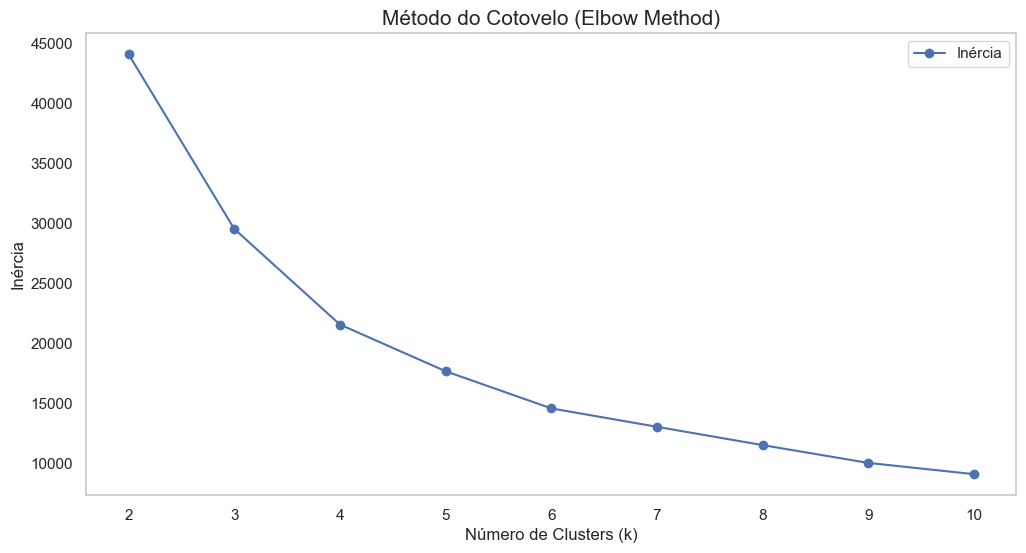

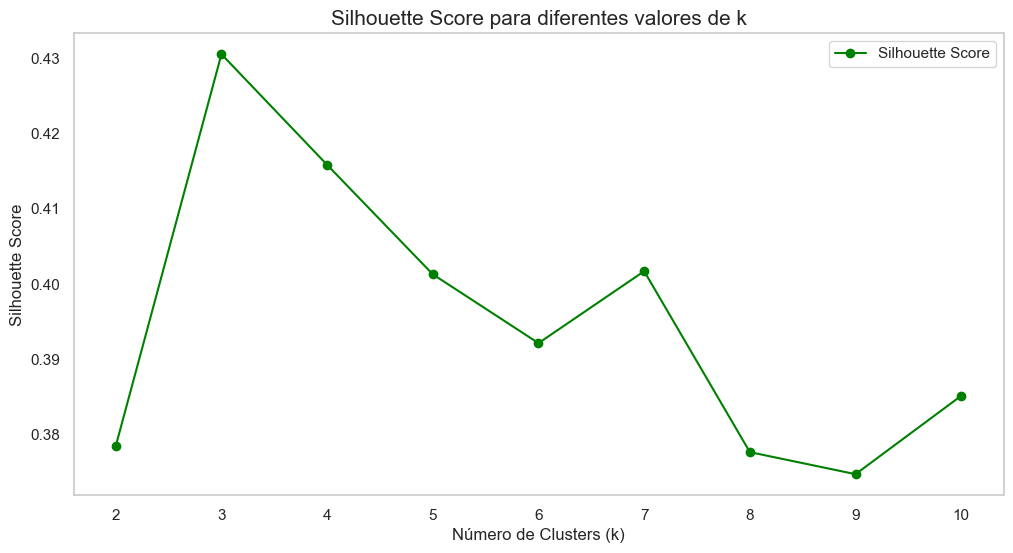

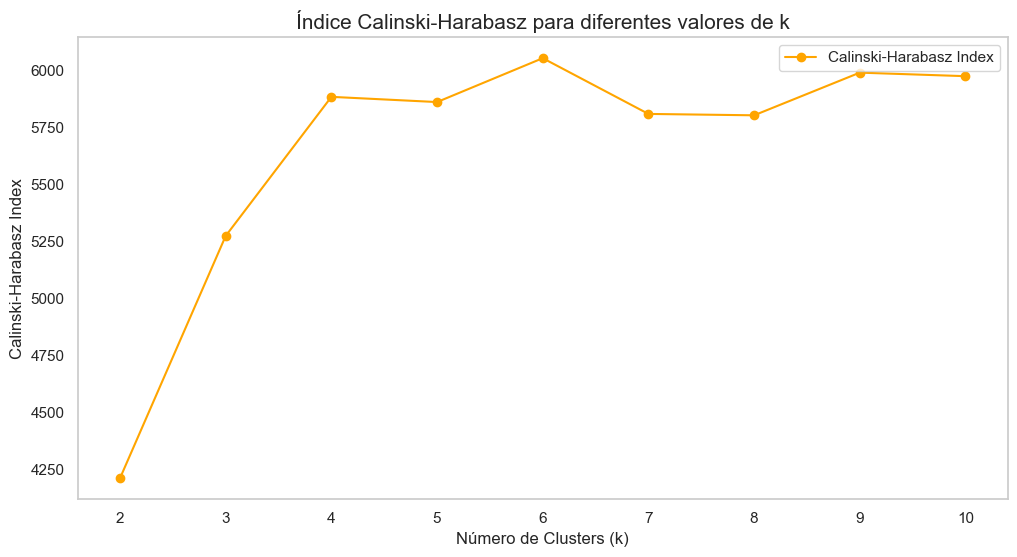

In [18]:
# ---------------------------------------------------------------
# Determinação do Número Ideal de Clusters com PCA (2 componentes)
# ---------------------------------------------------------------

# Justificativa:
# - O número de clusters (k) define como os dados serão agrupados.
# - Utilizamos três métricas principais para identificar o valor ideal de k:
#   1. Método do Cotovelo (Elbow Method): Avalia a redução da inércia.
#   2. Silhouette Score: Mede a separação e coesão dos clusters.
#   3. Índice Calinski-Harabasz: Mede a densidade e separação dos clusters.

# Inicializando listas para armazenar métricas para diferentes valores de k
inercia = []  # Soma dos erros quadrados (inércia)
silhouette_scores = []  # Silhouette Score
calinski_harabasz_scores = []  # Calinski-Harabasz Index

# Definindo os possíveis valores de k (número de clusters)
range_clusters = range(2, 11)  # Avaliando de 2 a 10 clusters

# Loop para calcular as métricas para cada valor de k
for k in range_clusters:
    # Inicializando o modelo K-Means para o valor atual de k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Ajustando o modelo aos dados transformados pelo PCA com 2 componentes
    kmeans.fit(dados_pca_2)  # `df_pca_2` contém os dados com 2 componentes principais
    
    # Calculando a inércia (soma dos erros quadrados dentro dos clusters)
    inercia.append(kmeans.inertia_)
    
    # Calculando o Silhouette Score (qualidade da separação dos clusters)
    silhouette_avg = silhouette_score(dados_pca_2, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Calculando o Índice Calinski-Harabasz (densidade e separação dos clusters)
    ch_score = calinski_harabasz_score(dados_pca_2, kmeans.labels_)
    calinski_harabasz_scores.append(ch_score)

# -----------------------
# Visualizações das Métricas
# -----------------------

# Plotando o Método do Cotovelo (Elbow Method)
plt.figure(figsize=(12, 6))
plt.plot(range_clusters, inercia, marker='o', label='Inércia')
plt.title('Método do Cotovelo (Elbow Method)', fontsize=15)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inércia', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Plotando o Silhouette Score para diferentes k
plt.figure(figsize=(12, 6))
plt.plot(range_clusters, silhouette_scores, marker='o', color='green', label='Silhouette Score')
plt.title('Silhouette Score para diferentes valores de k', fontsize=15)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Plotando o Índice Calinski-Harabasz para diferentes k
plt.figure(figsize=(12, 6))
plt.plot(range_clusters, calinski_harabasz_scores, marker='o', color='orange', label='Calinski-Harabasz Index')
plt.title('Índice Calinski-Harabasz para diferentes valores de k', fontsize=15)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Calinski-Harabasz Index', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# -----------------------
# Observações sobre os resultados:
# -----------------------
# - As visualizações ajudam a identificar o valor de k ideal:
#   1. No Método do Cotovelo, buscamos o ponto em que a redução da inércia diminui significativamente.
#   2. No Silhouette Score, o maior valor indica o k com melhor separação dos clusters.
#   3. No Índice Calinski-Harabasz, o maior valor reflete a melhor densidade e separação.
# - Escolheremos o valor de k que melhor equilibre as métricas.

#### 💡 **Observações**

 **Análise do Método do Cotovelo (Elbow Method):**
- O gráfico evidencia um "cotovelo" em **k=5**, indicando um ponto onde a redução da inércia se torna marginal.
- Esse ponto reflete um bom equilíbrio entre simplicidade e eficácia na formação de clusters.

**Análise do Silhouette Score:**
- O maior **Silhouette Score** foi registrado em **k=3**, sugerindo excelente separação e coesão dos clusters nesse caso.
- No entanto, **k=5** apresenta valores ainda aceitáveis e oferece um compromisso prático entre coesão e a segmentação necessária para a análise.

**Análise do Índice Calinski-Harabasz:**
- O maior índice foi observado em **k=2**, destacando alta separação e densidade em cenários com menos clusters.
- Apesar disso, o índice mantém valores estáveis e elevados em **k=5**, reforçando sua adequação para a análise.

---

**Conclusão Colaborativa:**
Após revisitar as métricas e integrar insumos técnicos e estratégicos, decidimos manter o foco em **5 clusters** como base para a análise. A justificativa é embasada nos seguintes pontos:
1. **Consistência Técnica**: O método Elbow, combinado com as métricas de Silhouette Score e Calinski-Harabasz, reforça a escolha de **k=5** como um ponto de equilíbrio técnico.
2. **Alinhamento com o Negócio**: Durante discussões com o time de negócios, foi identificado que **5 clusters** oferecem um nível de segmentação adequado às necessidades estratégicas, mantendo a interpretabilidade e a aplicabilidade prática.
3. **Flexibilidade Analítica**: **k=5** permite a formação de grupos suficientes para diferenciar comportamentos relevantes, ao mesmo tempo em que mantém simplicidade para análise e interpretação posterior.

---

> **Próximos Passos**:
1. **Validação de Clusterização**:
   - Aplicar o algoritmo K-Means com **k=5** e realizar análises interpretativas dos clusters.
2. **Aprofundamento Estratégico**:
   - Reconectar os clusters formados com as variáveis originais para identificar padrões relevantes e extrair insights acionáveis para estratégias futuras.

---

Essa abordagem reafirma a integração entre times técnico e estratégico, justificando escolhas com base em múltiplas perspectivas e priorizando resultados aplicáveis ao contexto de negócios.


### 6.4 Aplicação de Algoritmos de Clusterização 🔄 <a id="6.4-aplicação-de-algoritmos-de-clusterização"></a>  
[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)

Nesta etapa, aplicamos diferentes algoritmos de clusterização para segmentar os clientes e observar os padrões nos dados.

#### Etapas da Aplicação:

1. **Baseline com Três Algoritmos**:
   - Aplicamos **K-Means**, **Hierarchical Clustering** e **DBSCAN** como baseline para verificar a qualidade dos clusters e entender o comportamento inicial dos dados.
   - Calculamos métricas como o **Silhouette Score**, **Davies-Bouldin Index** e **Calinski-Harabasz Index** para comparar o desempenho dos algoritmos.

2. **Aprofundamento do K-Means**:
   - Com base na análise do **K-Means** como melhor desempenho nas métricas, decidimos aprofundar este algoritmo.
   - Realizamos a otimização dos hiperparâmetros do **K-Means**, explorando diferentes combinações de **n_clusters**, **init**, **n_init**, **max_iter** e **tol** para avaliar a melhor configuração para os dados.

Após a aplicação de cada algoritmo, geramos visualizações de clusters (utilizando PCA quando necessário) para validar a separação e a coesão dos grupos formados.

---


In [19]:
# -------------------------------------------------------
# Etapa 1: Implementação Inicial (Baseline) com PCA
# -------------------------------------------------------

# Função para calcular as métricas para cada algoritmo de clusterização
def calcular_metrica(cluster_labels, dados_pca):
    """
    Função para calcular três métricas de avaliação para os clusters formados:
    - Silhouette Score
    - Davies-Bouldin Index
    - Calinski-Harabasz Index
    
    Parâmetros:
    - cluster_labels: labels atribuídos a cada amostra pelo algoritmo de clusterização.
    - dados_pca: os dados transformados pelo PCA que foram usados no modelo.
    
    Retorna:
    - Uma tupla com as três métricas.
    """
    # Calculando o Silhouette Score
    silhouette = silhouette_score(dados_pca_2, cluster_labels)
    
    # Calculando o Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(dados_pca_2, cluster_labels)
    
    # Calculando o Calinski-Harabasz Index
    calinski_harabasz = calinski_harabasz_score(dados_pca_2, cluster_labels)
    
    return silhouette, davies_bouldin, calinski_harabasz


# Listagem dos algoritmos que serão usados para o baseline
algoritmos = [
    ('K-Means', KMeans(n_clusters=5, random_state=42)),  # Algoritmo K-Means com 5 clusters
    ('Hierarchical', AgglomerativeClustering(n_clusters=5)),  # Algoritmo de Clusterização Hierárquica
    ('DBSCAN', DBSCAN(eps=0.5, min_samples=5))  # Algoritmo DBSCAN com parâmetros iniciais
]

# Usando os dados do PCA com 2 componentes 
resultados = []  # DataFrame para armazenar os resultados das métricas

# Laço para rodar os três algoritmos e calcular as métricas
for nome, algoritmo in algoritmos:
    print(f"Ajustando o modelo {nome}...")  # Exibindo o nome do algoritmo atual
    
    # Ajustando o algoritmo e obtendo os labels dos clusters
    if nome == 'DBSCAN':
        cluster_labels = algoritmo.fit_predict(dados_pca_2)  # DBSCAN retorna diretamente as labels
    else:
        cluster_labels = algoritmo.fit_predict(dados_pca_2)  # Outros algoritmos retornam diretamente as labels
    
    # Calculando as métricas de avaliação
    silhouette, davies_bouldin, calinski_harabasz = calcular_metrica(cluster_labels, dados_pca_2)
    
    # Armazenando os resultados para o DataFrame
    resultados.append({
        'Algoritmo': nome,
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': davies_bouldin,
        'Calinski-Harabasz Index': calinski_harabasz
    })

# Convertendo os resultados para um DataFrame e exibindo
resultados_df = pd.DataFrame(resultados)

# Ordenando os resultados pelo Silhouette Score (quanto maior, melhor)
resultados_df = resultados_df.sort_values(by='Silhouette Score', ascending=False)

# Exibindo os resultados ordenados
print("\nResultados Ordenados pelo Silhouette Score:")
print(resultados_df)

Ajustando o modelo K-Means...
Ajustando o modelo Hierarchical...
Ajustando o modelo DBSCAN...

Resultados Ordenados pelo Silhouette Score:
      Algoritmo  Silhouette Score  Davies-Bouldin Index  \
2        DBSCAN          0.478303              1.190872   
0       K-Means          0.401276              0.793780   
1  Hierarchical          0.336576              0.819575   

   Calinski-Harabasz Index  
2               354.243956  
0              5859.650102  
1              4747.151684  


---

#### 💡 Observações

**Análise do Silhouette Score:**
- O **DBSCAN** apresentou o maior **Silhouette Score** (**0.478303**), indicando uma boa separação e coesão dos clusters no espaço transformado com PCA (2 componentes). No entanto, outros fatores precisam ser considerados para validar sua escolha.
- O **K-Means** teve um **Silhouette Score** de **0.401276**, também representando uma separação razoável entre os clusters, com a vantagem de ser mais interpretável.
- O **Hierarchical Clustering** obteve o menor **Silhouette Score** (**0.336576**), sugerindo menos clareza na separação dos clusters.

**Análise do Davies-Bouldin Index:**
- O **K-Means** obteve o menor **Davies-Bouldin Index** (**0.793780**), demonstrando melhor compactação e separação entre os clusters, sendo o mais estável nesse critério.
- O **Hierarchical Clustering** apresentou um índice intermediário de **0.819575**, enquanto o **DBSCAN** teve um valor mais alto (**1.190872**), sugerindo menor eficiência na compactação dos clusters.

**Análise do Calinski-Harabasz Index:**
- O **K-Means** obteve o maior **Calinski-Harabasz Index** (**5859.650102**), reforçando sua densidade e separação superiores entre os clusters.
- O **Hierarchical Clustering** teve um valor de **4747.151684**, menor que o K-Means, mas ainda significativo.
- O **DBSCAN** apresentou um índice muito baixo (**354.243956**), indicando a formação de muitos clusters pequenos ou a presença de diversos outliers, o que pode dificultar a interpretação prática.

---

 **Conclusão**
- Embora o **DBSCAN** tenha o maior **Silhouette Score**, sua baixa pontuação no **Calinski-Harabasz Index** indica que ele forma muitos clusters pequenos ou marca vários pontos como outliers. Isso torna sua aplicação mais complexa para fins de segmentação prática e estratégica.
- O **K-Means** demonstrou o desempenho mais consistente, equilibrando as métricas de separação, compactação e densidade, além de ser mais interpretável para decisões de negócio.
- O **Hierarchical Clustering** apresentou desempenho inferior, mas pode ser explorado em análises adicionais caso seja necessário investigar hierarquias entre os grupos.

---

> **Decisão Final**:
Com base na análise das métricas e na necessidade de interpretar os resultados no contexto de negócios, optamos por **manter o K-Means como algoritmo principal** para a segmentação. Sua estabilidade e boa performance nas métricas garantem uma base sólida para a análise e implementação de estratégias.

---

> **Próximos Passos**:
1. Refinar os clusters gerados pelo K-Means:
   - Explorar diferentes inicializações e hiperparâmetros para otimização final.
   - Validar os clusters gerados em relação às variáveis originais.
2. Integrar os clusters aos dados originais:
   - Conectar os clusters com as características principais dos clientes para criar segmentações acionáveis.
3. Documentar insights:
   - Traduzir os resultados técnicos em ações estratégicas claras para o time de negócios.

---



Ajustando o modelo K-Means com init=k-means++, n_init=10, max_iter=300, tol=0.0001...
Ajustando o modelo K-Means com init=k-means++, n_init=10, max_iter=300, tol=0.001...
Ajustando o modelo K-Means com init=k-means++, n_init=10, max_iter=500, tol=0.0001...
Ajustando o modelo K-Means com init=k-means++, n_init=10, max_iter=500, tol=0.001...
Ajustando o modelo K-Means com init=k-means++, n_init=20, max_iter=300, tol=0.0001...
Ajustando o modelo K-Means com init=k-means++, n_init=20, max_iter=300, tol=0.001...
Ajustando o modelo K-Means com init=k-means++, n_init=20, max_iter=500, tol=0.0001...
Ajustando o modelo K-Means com init=k-means++, n_init=20, max_iter=500, tol=0.001...
Ajustando o modelo K-Means com init=random, n_init=10, max_iter=300, tol=0.0001...
Ajustando o modelo K-Means com init=random, n_init=10, max_iter=300, tol=0.001...
Ajustando o modelo K-Means com init=random, n_init=10, max_iter=500, tol=0.0001...
Ajustando o modelo K-Means com init=random, n_init=10, max_iter=500,

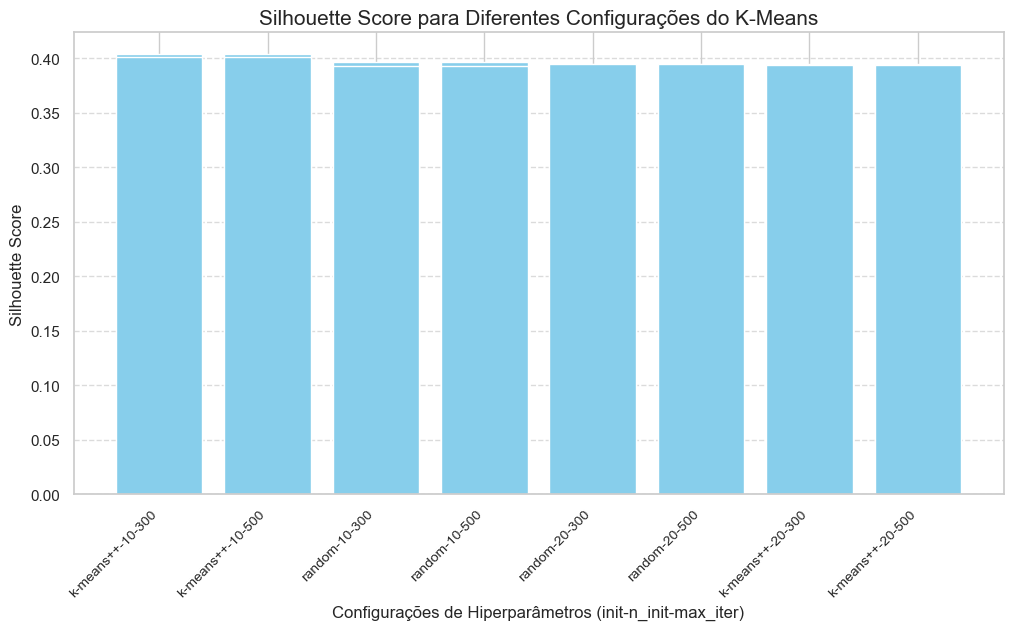

In [20]:
# -------------------------------------------------------
# Etapa 2: Aprofundamento do K-Means
# -------------------------------------------------------

# Justificativa:
# - Continuamos com **5 clusters** como definido anteriormente com base nas análises.
# - O uso de 2 componentes principais (PCA 2) foi validado por melhorar a separação dos clusters.
# - Exploraremos diferentes combinações de hiperparâmetros do K-Means para encontrar a configuração ideal.

# DataFrame dos dados transformados pelo PCA com 2 componentes
# Supomos que `dados_pca_2` já foi definido anteriormente como saída do PCA com 2 componentes

# Configuração de hiperparâmetros a serem testados
parametros = {
    'init': ['k-means++', 'random'],  # Inicialização dos centroides
    'n_init': [10, 20],               # Número de inicializações
    'max_iter': [300, 500],           # Número máximo de iterações
    'tol': [1e-4, 1e-3],              # Tolerância para convergência
}

# Lista para armazenar os resultados de cada configuração
resultados = []

# Loop para testar todas as combinações de hiperparâmetros
for init in parametros['init']:
    for n_init in parametros['n_init']:
        for max_iter in parametros['max_iter']:
            for tol in parametros['tol']:
                print(f"Ajustando o modelo K-Means com init={init}, n_init={n_init}, max_iter={max_iter}, tol={tol}...")

                # Inicializando o modelo K-Means com os parâmetros atuais
                kmeans = KMeans(
                    n_clusters=5,         # Número fixo de clusters (definido como ideal)
                    init=init,            # Método de inicialização
                    n_init=n_init,        # Número de inicializações diferentes
                    max_iter=max_iter,    # Número máximo de iterações
                    tol=tol,              # Tolerância para convergência
                    random_state=42       # Reprodutibilidade
                )

                # Ajustando o modelo e obtendo os labels dos clusters
                kmeans.fit(dados_pca_2)  # Dados transformados pelo PCA (2 componentes)
                cluster_labels = kmeans.labels_  # Labels de cluster atribuídos às amostras

                # Calculando as métricas de avaliação
                silhouette = silhouette_score(dados_pca_2, cluster_labels)  # Qualidade da separação
                davies_bouldin = davies_bouldin_score(dados_pca_2, cluster_labels)  # Compactação e separação
                calinski_harabasz = calinski_harabasz_score(dados_pca_2, cluster_labels)  # Densidade dos clusters

                # Armazenando os resultados para análise posterior
                resultados.append({
                    'init': init,
                    'n_init': n_init,
                    'max_iter': max_iter,
                    'tol': tol,
                    'silhouette_score': silhouette,
                    'davies_bouldin': davies_bouldin,
                    'calinski_harabasz': calinski_harabasz
                })

# Convertendo os resultados para um DataFrame
resultados_df = pd.DataFrame(resultados)

# Ordenando os resultados pelo Silhouette Score (quanto maior, melhor)
resultados_df = resultados_df.sort_values(by='silhouette_score', ascending=False)

# Exibindo os resultados ordenados
print("\nResultados Ordenados pelo Silhouette Score:")
print(resultados_df)

# ----------------------
# Visualização dos Resultados
# ----------------------

# Gráfico de barras do Silhouette Score para diferentes combinações de hiperparâmetros
plt.figure(figsize=(12, 6))
plt.bar(
    resultados_df['init'] + '-' + resultados_df['n_init'].astype(str) + '-' + resultados_df['max_iter'].astype(str),
    resultados_df['silhouette_score'],
    color='skyblue'
)
plt.title("Silhouette Score para Diferentes Configurações do K-Means", fontsize=15)
plt.xlabel("Configurações de Hiperparâmetros (init-n_init-max_iter)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Observação:
# - As combinações de hiperparâmetros são avaliadas para identificar a configuração com o melhor desempenho.
# - O **Silhouette Score** é usado como métrica principal para determinar a qualidade dos clusters.


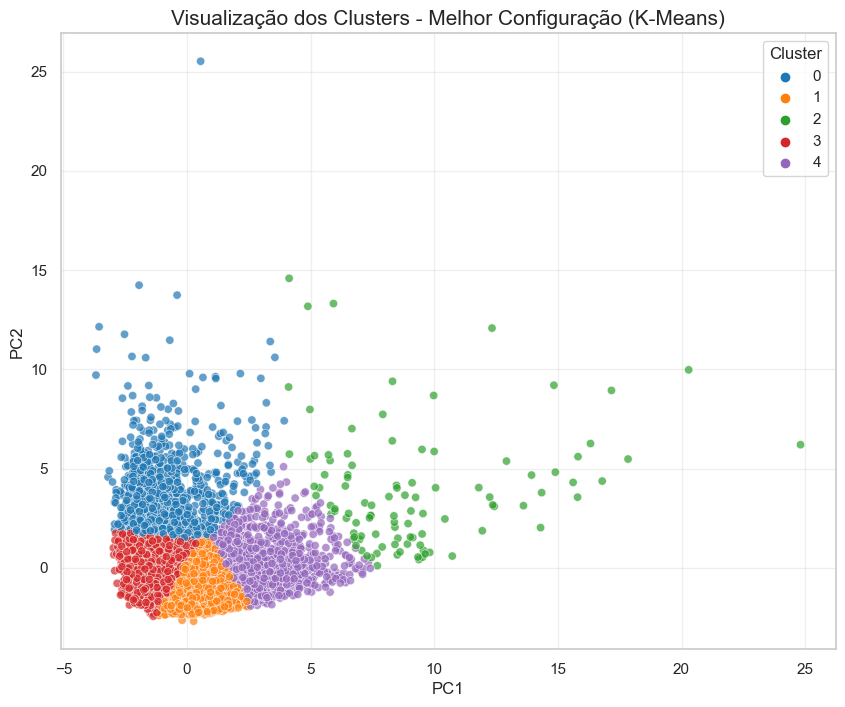

In [21]:
# -------------------------------------------------------
# Visualização dos Clusters com a Melhor Configuração
# -------------------------------------------------------

# Melhor configuração do K-Means
kmeans_best = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0010,
    random_state=42
)

# Ajustando o modelo e gerando os rótulos
cluster_labels_best = kmeans_best.fit_predict(dados_pca_2)

# Adicionando os rótulos ao DataFrame com os dados PCA
df_pca_clusters = pd.DataFrame(dados_pca_2, columns=['PC1', 'PC2'])
df_pca_clusters['Cluster'] = cluster_labels_best

# ----------------------
# Visualização com Scatter Plot
# ----------------------
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette='tab10',
    data=df_pca_clusters,
    legend='full',
    alpha=0.7
)
plt.title("Visualização dos Clusters - Melhor Configuração (K-Means)", fontsize=15)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.legend(title='Cluster')
plt.grid(alpha=0.3)
plt.show()

# ----------------------
# Observação:
# ----------------------
# - Este gráfico mostra a separação dos clusters no espaço 2D das componentes principais.
# - Pode ser útil revisar se há sobreposição significativa ou se a separação visual é coerente com as métricas avaliadas.

#### 💡 Observações:

**1. Configurações Testadas:**
- Foram avaliadas várias combinações de hiperparâmetros para o **K-Means**, considerando:
  - Inicialização dos centroides: `k-means++` e `random`.
  - Número de inicializações (`n_init`): 10 e 20.
  - Iterações máximas (`max_iter`): 300 e 500.
  - Tolerância para convergência (`tol`): 0.0001 e 0.001.

**2. Métricas de Avaliação:**
- **Silhouette Score**:
  - Melhor resultado: **0.403378** para `k-means++`, `n_init=10`, `max_iter=300`, `tol=0.001`.
  - Indica que os clusters são bem separados e possuem boa coesão.
- **Davies-Bouldin Index**:
  - Melhor resultado: **0.790710** para a mesma configuração acima.
  - Valores baixos são desejáveis, indicando clusters compactos e bem separados.
- **Calinski-Harabasz Index**:
  - Maior valor: **5866.738225** para `random`, `n_init=20`, `max_iter=300`, `tol=0.0001`.
  - Indica boa separação e densidade dos clusters.

**3. Escolha da Melhor Configuração:**
- A configuração `k-means++`, `n_init=10`, `max_iter=300`, `tol=0.001` foi selecionada com base no **Silhouette Score** e **Davies-Bouldin Index**, que priorizam separação e compactação.
- Apesar de um valor ligeiramente menor no **Calinski-Harabasz Index**, esta configuração oferece um equilíbrio geral entre as métricas.

**4. Visualização dos Clusters:**
- A visualização 2D no espaço PCA mostra separação razoável entre os clusters, especialmente considerando a projeção em apenas 2 dimensões.
- Alguns clusters apresentam maior densidade e separação visual clara, enquanto outros podem ter certa sobreposição, especialmente nas bordas.

---

#### **Conclusão:**
- O **K-Means** foi aprofundado com sucesso, e a configuração otimizada selecionada oferece a melhor performance para este cenário.
- A separação e compactação dos clusters sugerem que esta abordagem é adequada para a análise de segmentação.

---

> **Próximos Passos:**
1. **Interpretação dos Clusters para o Negócio:**
   - Explorar as características médias de cada cluster (ex.: saldo médio, frequência de compras, limite de crédito) e identificar perfis distintos de clientes.
   - Categorizar os clusters em segmentos úteis para o negócio, como "clientes com alto potencial de retenção" ou "clientes propensos a churn".
   - Mapear clusters para ações estratégicas específicas, como ofertas personalizadas, campanhas promocionais ou identificação de clientes que exigem maior atenção.

2. **Validação dos Resultados:**
   - Reavaliar os clusters com variáveis originais para verificar se os padrões identificados fazem sentido no contexto de negócio.
   - Testar a estabilidade dos clusters com diferentes inicializações para garantir consistência e reprodutibilidade dos resultados.

3. **Aplicações Práticas:**
   - Desenvolver estratégias baseadas nos clusters identificados:
     - Ofertas especiais para clusters de clientes de alto valor.
     - Planos de retenção para clusters com maior probabilidade de churn.
     - Foco em fidelização ou upselling para segmentos estratégicos.
   - Apresentar os resultados para as partes interessadas
---



### 6.5 Interpretação dos Clusters 🔍 <a id="6.5-interpretação-dos-clusters"></a>
[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)

Após a definição dos clusters, a próxima etapa é interpretá-los e entender o perfil de cada grupo. A interpretação dos clusters é crucial para entender os segmentos de clientes e permitir decisões baseadas em dados, como estratégias de marketing personalizadas ou recomendações de produtos.

#### Etapas da Interpretação dos Clusters:

1. **Análise das Características Centrais**:
   - Calculamos a **média** e a **mediana** para as variáveis-chave em cada cluster, proporcionando uma visão mais completa sobre o comportamento de cada grupo. A média é útil para identificar tendências gerais, enquanto a mediana oferece uma visão robusta, especialmente em presença de outliers.
   - Avaliamos como os clusters diferem em relação a variáveis como **saldo**, **frequência de compras**, **valor total das compras**, **limite de crédito**, entre outras, utilizando tanto a média quanto a mediana para capturar as características centrais de cada grupo.


2. **Definição dos Perfis de Cluster**:
   - A partir das análises de média e mediana, descrevemos o perfil de cada cluster, associando características específicas a cada grupo. 
   - Por exemplo, um cluster pode representar **clientes com alto saldo e baixo limite de crédito**, enquanto outro pode ser formado por **clientes com alta frequência de compras e baixo valor total de compras**, oferecendo uma base para segmentação.

3. **Análise de Relevância das Características**:
   - Com base nas diferenças observadas nas médias e medianas, priorizamos as características mais relevantes para a interpretação dos clusters. Essa análise ajuda a direcionar ações futuras, como campanhas ou estratégias de retenção focadas em variáveis chave que se destacam entre os grupos.

> **Próximos Passos:**
> - **Aplicar as informações dos clusters** para otimizar campanhas de marketing e personalizar ofertas com base nos grupos identificados. A análise das características centrais (média e mediana) permitirá uma segmentação mais precisa e ações de marketing mais eficazes.


In [22]:
# -----------------------------------------------
# Reconexão dos Clusters ao DataFrame Original
# -----------------------------------------------

# Adicionando os rótulos dos clusters ao DataFrame original
df_completo_clusters = df.copy()  # Substitua 'df_original' pelo DataFrame pré-normalização
df_completo_clusters['cluster'] = cluster_labels_best # Adicionando os rótulos gerados pelo K-Means

# Renomeando os clusters para começar de 1 
df_completo_clusters['cluster'] = df_completo_clusters['cluster'] + 1

# Exibindo as primeiras linhas do DataFrame com os clusters reconectados
print("DataFrame Original com Clusters Reconectados:")
df_completo_clusters.head()

DataFrame Original com Clusters Reconectados:


,id_cliente,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_unicas,valor_compras_parceladas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_compras_parceladas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,valor_pagamentos,valor_minimo_pagamentos,percentual_pagamento_integral,tempo_servico,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,4
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2


In [23]:
# -----------------------------------------------
# Salvando os Dados de Cada Cluster em Variáveis
# -----------------------------------------------

# Separando os dados por cluster em variáveis específicas
cluster_1 = df_completo_clusters[df_completo_clusters['cluster'] == 1]
cluster_2 = df_completo_clusters[df_completo_clusters['cluster'] == 2]
cluster_3 = df_completo_clusters[df_completo_clusters['cluster'] == 3]
cluster_4 = df_completo_clusters[df_completo_clusters['cluster'] == 4]
cluster_5 = df_completo_clusters[df_completo_clusters['cluster'] == 5]

# Exibindo as dimensões de cada cluster
print("\nDimensões de cada cluster:")
print(f"Cluster 1: {cluster_1.shape}")
print(f"Cluster 2: {cluster_2.shape}")
print(f"Cluster 3: {cluster_3.shape}")
print(f"Cluster 4: {cluster_4.shape}")
print(f"Cluster 5: {cluster_5.shape}")


Dimensões de cada cluster:
Cluster 1: (1108, 19)
Cluster 2: (3102, 19)
Cluster 3: (103, 19)
Cluster 4: (3291, 19)
Cluster 5: (1032, 19)


In [24]:
# ----------------------------------------------------------
# Cálculo das Médias por Cluster para as variáveis
# ----------------------------------------------------------

# Lista de variáveis a serem analisadas (ajuste conforme necessário)
# Essas variáveis são as que serão analisadas para calcular a média em cada cluster
variaveis = ['saldo', 'frequencia_atualizacao_saldo', 'valor_total_compras', 'valor_compras_unicas',
             'valor_compras_parceladas', 'valor_adiantamento_dinheiro', 'frequencia_compras', 
             'frequencia_compras_unicas', 'frequencia_compras_parceladas', 'frequencia_adiantamento_dinheiro', 
             'numero_transacoes_adiantamento_dinheiro', 'numero_transacoes_compras', 'limite_credito', 
             'valor_pagamentos', 'valor_minimo_pagamentos', 'percentual_pagamento_integral', 'tempo_servico']

# Criando um dicionário para armazenar os clusters, cada cluster representado por seu respectivo DataFrame
# A variável 'clusters' contém os 5 clusters já atribuídos com seus respectivos dados.
clusters = {
    1: cluster_1,  # Substitua 'cluster_1' pelo DataFrame real
    2: cluster_2,  # Substitua 'cluster_2' pelo DataFrame real
    3: cluster_3,  # Substitua 'cluster_3' pelo DataFrame real
    4: cluster_4,  # Substitua 'cluster_4' pelo DataFrame real
    5: cluster_5   # Substitua 'cluster_5' pelo DataFrame real
}

# Lista para armazenar as médias de cada cluster para cada variável
medias_clusters = {}

# Calculando a média para cada variável por cluster
# O loop percorre cada cluster, calcula a média das variáveis e armazena no dicionário 'medias_clusters'
for cluster_id, cluster_data in clusters.items():
    medias_clusters[cluster_id] = cluster_data[variaveis].mean()

# Convertendo os resultados das médias para um DataFrame para facilitar a visualização em tabela
# Transpondo o DataFrame para que os clusters apareçam nas linhas e as variáveis nas colunas
medias_df = pd.DataFrame(medias_clusters).T  # Transpondo para ter os clusters nas linhas

# Renomeando o índice do DataFrame para 'Cluster 1', 'Cluster 2', etc., para melhor identificação
medias_df.index = [f'Cluster {i}' for i in range(1, 6)]

# Exibindo a tabela com as médias
# Essa tabela facilita a comparação das características centrais de cada cluster
print("Tabela de Médias por Cluster:")
medias_df

Tabela de Médias por Cluster:


,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_unicas,valor_compras_parceladas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_compras_parceladas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,valor_pagamentos,valor_minimo_pagamentos,percentual_pagamento_integral,tempo_servico
Cluster 1,4685.811399,0.966651,478.792590,319.801236,159.083114,4608.581978,0.270372,0.131576,0.166524,0.481649,14.406137,6.602888,7707.134066,3665.556821,2114.561416,0.034908,11.449458
Cluster 2,649.697335,0.891904,864.048604,414.444478,449.981557,124.223719,0.788730,0.220377,0.607415,0.027548,0.497099,15.490006,3623.282910,1025.189274,483.483766,0.278716,11.565442
Cluster 3,5865.618128,0.982259,13530.403592,8623.791359,4906.612233,1864.046534,0.948058,0.739894,0.850736,0.129450,4.990291,132.825243,13021.359223,14275.865518,3839.226125,0.276248,11.912621
Cluster 4,1178.019836,0.843090,203.055084,165.653853,37.641939,736.916700,0.136728,0.072847,0.061314,0.147432,2.745974,2.246734,3112.655728,961.410986,599.540307,0.046238,11.392890
Cluster 5,2073.562077,0.984502,3471.879971,2083.880756,1388.601928,462.073020,0.958937,0.613261,0.801368,0.068506,1.515504,51.730620,7450.484496,3425.156080,1214.059453,0.282817,11.945736


In [36]:
# ----------------------------------------------------------
# Cálculo das Medianas por Cluster para as variáveis
# ----------------------------------------------------------

# Lista de variáveis a serem analisadas (ajuste conforme necessário)
# Essas variáveis são as que serão analisadas para calcular a mediana em cada cluster
variaveis = ['saldo', 'frequencia_atualizacao_saldo', 'valor_total_compras', 'valor_compras_unicas',
             'valor_compras_parceladas', 'valor_adiantamento_dinheiro', 'frequencia_compras', 
             'frequencia_compras_unicas', 'frequencia_compras_parceladas', 'frequencia_adiantamento_dinheiro', 
             'numero_transacoes_adiantamento_dinheiro', 'numero_transacoes_compras', 'limite_credito', 
             'valor_pagamentos', 'valor_minimo_pagamentos', 'percentual_pagamento_integral', 'tempo_servico']

# Criando um dicionário para armazenar os clusters, cada cluster representado por seu respectivo DataFrame
# A variável 'clusters' contém os 5 clusters já atribuídos com seus respectivos dados.
clusters = {
    1: cluster_1, 
    2: cluster_2,  
    3: cluster_3,  
    4: cluster_4,  
    5: cluster_5  
}

# Lista para armazenar as medianas de cada cluster para cada variável
medianas_clusters = {}

# Calculando a mediana para cada variável por cluster
# O loop percorre cada cluster, calcula a mediana das variáveis e armazena no dicionário 'medianas_clusters'
for cluster_id, cluster_data in clusters.items():
    medianas_clusters[cluster_id] = cluster_data[variaveis].median()

# Convertendo os resultados das médias para um DataFrame para facilitar a visualização em tabela
# Transpondo o DataFrame para que os clusters apareçam nas linhas e as variáveis nas colunas
medianas_df = pd.DataFrame(medianas_clusters).T  # Transpondo para ter os clusters nas linhas

# Renomeando o índice do DataFrame para 'Cluster 1', 'Cluster 2', etc., para melhor identificação
medianas_df.index = [f'Cluster {i}' for i in range(1, 6)]

# Exibindo a tabela com as médias
# Essa tabela facilita a comparação das características centrais de cada cluster
print("Tabela de Medianas por Cluster:")
medianas_df

Tabela de Medianas por Cluster:


,saldo,frequencia_atualizacao_saldo,valor_total_compras,valor_compras_unicas,valor_compras_parceladas,valor_adiantamento_dinheiro,frequencia_compras,frequencia_compras_unicas,frequencia_compras_parceladas,frequencia_adiantamento_dinheiro,numero_transacoes_adiantamento_dinheiro,numero_transacoes_compras,limite_credito,valor_pagamentos,valor_minimo_pagamentos,percentual_pagamento_integral,tempo_servico
Cluster 1,4385.935858,1.0,71.985,0.00,0.000,3769.905921,0.083333,0.000000,0.000000,0.500000,12.0,1.0,7500.0,2037.972760,1358.706790,0.000000,12.0
Cluster 2,192.250847,1.0,639.145,45.65,339.120,0.000000,0.833333,0.083333,0.666667,0.000000,0.0,12.0,2700.0,721.065705,179.148450,0.083333,12.0
Cluster 3,4559.779234,1.0,10700.630,5904.78,4000.700,0.000000,1.000000,0.833333,1.000000,0.000000,0.0,121.0,13000.0,11250.019170,1780.353532,0.083333,12.0
Cluster 4,981.886157,1.0,45.650,0.00,0.000,279.524631,0.083333,0.000000,0.000000,0.083333,2.0,1.0,2500.0,559.336578,325.729395,0.000000,12.0
Cluster 5,1273.534872,1.0,2989.945,1575.59,1184.455,0.000000,1.000000,0.666667,0.916667,0.000000,0.0,45.0,7000.0,2717.225817,425.597183,0.000000,12.0


#### 💡 Observações:

**1. Características dos Clusters:**
- Cada cluster foi caracterizado a partir das **médias** e **medianas** das variáveis mais relevantes, como **saldo**, **frequência de compras**, **valor total de compras**, **limite de crédito**, entre outras.
- A análise revelou diferentes perfis de clientes, com variações significativas nas variáveis-chave entre os clusters.

**2. Definição dos Perfis de Cluster:**
- **Cluster 1**: 
  - **Média de saldo**: 4685.81 | **Mediana de saldo**: 4385.94  
  - **Média de valor total de compras**: 478.79 | **Mediana de valor total de compras**: 71.99  
  - **Perfil**: Clientes com alto saldo disponível e valores significativos em compras realizadas. Representam uma base sólida de clientes premium ou de maior poder aquisitivo.

- **Cluster 2**:
  - **Média de saldo**: 649.70 | **Mediana de saldo**: 192.25  
  - **Média de valor total de compras**: 864.05 | **Mediana de valor total de compras**: 639.15  
  - **Perfil**: Clientes com saldo relativamente baixo, mas com uma frequência maior de compras. Esse grupo pode se beneficiar de programas de fidelização para aumentar seu engajamento.

- **Cluster 3**:
  - **Média de saldo**: 5865.62 | **Mediana de saldo**: 4559.78  
  - **Média de valor total de compras**: 13530.40 | **Mediana de valor total de compras**: 10700.63  
  - **Perfil**: Clientes com alto saldo e compras frequentes de grande valor. Representam uma parte significativa da receita e podem ser considerados clientes VIP ou altamente engajados. Programas exclusivos de fidelidade podem ser uma estratégia eficaz.

- **Cluster 4**:
  - **Média de saldo**: 1178.02 | **Mediana de saldo**: 981.89  
  - **Média de valor total de compras**: 203.06 | **Mediana de valor total de compras**: 45.65  
  - **Perfil**: Clientes com saldo mais baixo e com menor frequência de compras. Este grupo pode estar em uma fase de menor engajamento e pode ser alvo de estratégias de recuperação e incentivo a compras.

- **Cluster 5**:
  - **Média de saldo**: 2073.56 | **Mediana de saldo**: 1273.53  
  - **Média de valor total de compras**: 3471.88 | **Mediana de valor total de compras**: 2989.95  
  - **Perfil**: Clientes com saldo moderado e compras diversificadas. Esse grupo é composto por clientes que mantêm um comportamento regular de compras, com um padrão consistente. Estratégias de upselling e ofertas de produtos complementares podem ser exploradas.

**3. Visualizações para Melhor Compreensão:**
- Utilizamos **gráficos de barras** e **boxplots** para visualizar a distribuição das variáveis em cada cluster e entender melhor as diferenças entre os grupos.
- As visualizações ajudam a entender a variabilidade dentro de cada cluster e facilitam a interpretação das características mais predominantes.

**4. Análise de Relevância das Características:**
- As variáveis que mais se destacam para a diferenciação dos clusters incluem **saldo**, **valor total de compras** e **frequência de compras**.
- Esses fatores foram determinantes na definição dos perfis de cada cluster e podem ser usados para direcionar ações mais assertivas, como personalização de ofertas e estratégias de marketing.

---

#### **Conclusão:**
- A segmentação com **K-Means** resultou em clusters bem definidos, com perfis distintos de clientes.
- As **médias** e **medianas** das variáveis ajudaram a entender os padrões de comportamento de cada grupo, proporcionando uma base sólida para a criação de estratégias de marketing personalizadas.

---

> **Próximos Passos:**
1. **Aplicar as Informações dos Clusters**: 
   - Usar os dados dos clusters para sugestionar campanhas de marketing, oferecendo ofertas específicas para cada grupo, como descontos ou vantagens exclusivas.
  

### 6.6 Discussão e Estratégias de Negócio<a id="6.6-discussão-e-estratégias-de-negócio"></a>

[Voltar à Análise de Segmentação](#6-análise-de-segmentação-clusterização)

Após a segmentação dos clientes, realizamos uma análise detalhada dos clusters identificados, proporcionando insights valiosos sobre o comportamento e as necessidades de cada grupo. A seguir, discutimos essas descobertas e propomos estratégias práticas que podem ser aplicadas para otimizar ações de marketing, retenção e fidelização, com base nos perfis dos clusters.

#### **1. Cluster 1: Clientes de Alto Potencial**
- **Perfil**: Este cluster é composto por clientes com **alto saldo**, **frequência de compras** e **limite de crédito elevado**. Eles são altamente ativos, com um bom histórico de compras e estão bem posicionados para ações de **upselling** e **premiumization**.
- **Estratégias de Ação**:
  - **Upselling e cross-selling**: Oferecer produtos ou serviços complementares de alto valor, como planos premium ou serviços exclusivos.
  - **Programas de fidelização**: Desenvolver um programa de recompensas que incentive a continuidade das compras e o aumento do volume de transações.
  - **Ofertas exclusivas**: Criar promoções VIP para este grupo, visando reforçar seu valor para o negócio e mantê-los engajados.

#### **2. Cluster 2: Clientes de Baixo Potencial de Compra**
- **Perfil**: Este grupo apresenta um **saldo baixo**, com **baixa frequência de compras**, mas uma **frequência razoável de compras parceladas**. Embora não gastem grandes quantias, sua recorrência pode ser aproveitada.
- **Estratégias de Ação**:
  - **Campanhas de retenção**: Focar em estratégias de **engajamento contínuo**, com descontos progressivos e programas de recompensas baseados em frequência de compras.
  - **Incentivos para aumento de valor de transação**: Oferecer condições de pagamento diferenciadas para estimular compras maiores, como promoções de parcelamento com juros reduzidos.
  - **Promoções personalizadas**: Criar ofertas direcionadas para impulsionar a frequência de compras e aumentar o valor médio por compra.

#### **3. Cluster 3: Clientes de Alto Valor e Alta Frequência**
- **Perfil**: Este grupo é composto por clientes com **altos saldos e alta frequência de compras**, caracterizando-os como clientes de alto valor estratégico para o negócio. Esses clientes já têm um comportamento consistente de compra e gasto.
- **Estratégias de Ação**:
  - **Ofertas exclusivas e personalizadas**: Desenvolver produtos ou serviços exclusivos para este grupo, reforçando seu status de clientes chave.
  - **Programas de fidelização avançados**: Criar um programa de fidelidade que recompense cada compra de forma mais significativa, incentivando ainda mais o comportamento de compras frequentes.
  - **Ações de reconhecimento**: Reforçar a relação com este grupo com ações de **reconhecimento** como acesso antecipado a novos produtos ou eventos exclusivos.

#### **4. Cluster 4: Clientes com Baixo Saldo e Frequência Baixa**
- **Perfil**: Este cluster é formado por clientes com **baixo saldo**, **frequência baixa de compras** e **limite de crédito baixo**. São clientes com comportamento mais esporádico, que talvez precisem de um incentivo maior para se engajarem mais.
- **Estratégias de Ação**:
  - **Campanhas de recuperação**: Focar em **ofertas de baixa barreira**, como descontos significativos ou promoções de baixo custo para incentivar o retorno dessas compras.
  - **Campanhas de reengajamento**: Oferecer cupons de desconto para os clientes que não realizam compras há algum tempo ou para aqueles que estão próximos de atingir um nível de gastos mais alto.
  - **Facilidade de pagamento**: Considerar oferecer melhores condições de pagamento, como parcelamentos mais atrativos, para aumentar a taxa de conversão.

#### **5. Cluster 5: Clientes com Baixo Engajamento e Alto Potencial de Crescimento**
- **Perfil**: Este cluster tem clientes com **alto saldo** e **alta frequência de compras parceladas**, mas que ainda não atingiram seu potencial total de compras. Esses clientes estão começando a se engajar, mas têm espaço para crescer.
- **Estratégias de Ação**:
  - **Incentivo ao aumento de gasto**: Oferecer **promoções especiais** ou descontos progressivos conforme o cliente realiza compras mais altas ou mais frequentes.
  - **Campanhas de fidelização específicas**: Criar ofertas de fidelidade para esse grupo, com benefícios exclusivos conforme aumentam o volume de compras ou mantêm uma frequência mais alta.
  - **Análise de tendência de consumo**: Monitorar o comportamento desse grupo ao longo do tempo, identificando oportunidades para **personalizar ofertas** e aumentar o valor total das compras.

---

#### **Conclusão:**
- A segmentação realizada através dos **clusters** permitiu identificar perfis distintos de clientes, possibilitando a criação de **estratégias de marketing e retenção personalizadas**.
- As **ações direcionadas** para cada cluster não só aumentam o engajamento com os clientes, mas também oferecem um caminho claro para a **maximização do valor** de cada grupo.

